In [ ]:
Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique 
position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. 
It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model 
that predicts if an insurance claim is fraudulent or not

Independent Variables
1.	months_as_customer: Number of months of patronage
2.	age: the length of time a customer has lived or a thing has existed
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	policy_csl: is basically Combined Single Limit
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	insured_zip: It is the zip code where the insurance was made
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	insured_education_level: This refers to the Level of education of the customer
13.	insured_occupation: This refers Occupation of the customer
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship
    (that is, living together but not married); or. in a civil partnership
16.	capital-gains: This refers to profit accrued due to insurance premium
17.	capital-loss: This refers to the losses incurred due to insurance claims
18.	incident_date: This refers to the date which claims where made by customers
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
20.	collision_type: This refers to the area of damage on the vehicle
21.	incident_severity: This refers to the extent/level of damage
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
23.	incident_state: This refers to the state at which the accident happened
24.	incident_city: This refers to the city at which the accident happened
25.	1ncident_location: This refers to the location at which the accident happened
26.	incident_hour_of_the_day: The period of the day which accident took place
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
28.	property_damage: This refers to whether property was damaged or not
29.	bodily_injuries: This refers to injuries sustained
30.	witnesses: This refers to the number of witnesses involved
31.	police_report_available: This refers to whether the report on damage was documented or not
32.	total_claim_amount: This refers to the financial implications involved in claims
33.	injury_claim: This refers to physical injuries sustained
34.	property_claim: This refers to property damages during incident
35.	vehicle_claim: This refers to property damages during incident
36.	auto_make: This refers to the make of the vehicle
37.	auto_year: This refers to the year which the vehicle was manufactured
38.	_c39:
39.	fraud_reported

I am required to create a predictive model that predicts if an insurance claim is fraudulent or not,therefore this is a 
binary classification problem.

In [425]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [426]:
#loading the data 
df=pd.read_csv(r"C:\Users\bee\Desktop\Data set\Automobile_insurance_fraud.csv")

In [427]:
#printing first five records
df.head()

328  48  521585  17-10-2014  OH   250/500  1000  1406.91        0  466132  \
0  228  42  342868  27-06-2006  IN   250/500  2000  1197.22  5000000  468176   
1  134  29  687698  06-09-2000  OH   100/300  2000  1413.14  5000000  430632   
2  256  41  227811  25-05-1990  IL   250/500  2000  1415.74  6000000  608117   
3  228  44  367455  06-06-2014  IL  500/1000  1000  1583.91  6000000  610706   
4  256  39  104594  12-10-2006  OH   250/500  1000  1351.10        0  478456   

   ...  2 YES.1  71610  6510 13020  52080       Saab    92x  2004  Y  
0  ...  0     ?   5070   780   780   3510   Mercedes   E400  2007  Y  
1  ...  3    NO  34650  7700  3850  23100      Dodge    RAM  2007  N  
2  ...  2    NO  63400  6340  6340  50720  Chevrolet  Tahoe  2014  Y  
3  ...  1    NO   6500  1300   650   4550     Accura    RSX  2009  N  
4  ...  2    NO  64100  6410  6410  51280       Saab     95  2003  Y  

[5 rows x 39 columns]

In [428]:
#printing last five records
df.head()

328  48  521585  17-10-2014  OH   250/500  1000  1406.91        0  466132  \
0  228  42  342868  27-06-2006  IN   250/500  2000  1197.22  5000000  468176   
1  134  29  687698  06-09-2000  OH   100/300  2000  1413.14  5000000  430632   
2  256  41  227811  25-05-1990  IL   250/500  2000  1415.74  6000000  608117   
3  228  44  367455  06-06-2014  IL  500/1000  1000  1583.91  6000000  610706   
4  256  39  104594  12-10-2006  OH   250/500  1000  1351.10        0  478456   

   ...  2 YES.1  71610  6510 13020  52080       Saab    92x  2004  Y  
0  ...  0     ?   5070   780   780   3510   Mercedes   E400  2007  Y  
1  ...  3    NO  34650  7700  3850  23100      Dodge    RAM  2007  N  
2  ...  2    NO  63400  6340  6340  50720  Chevrolet  Tahoe  2014  Y  
3  ...  1    NO   6500  1300   650   4550     Accura    RSX  2009  N  
4  ...  2    NO  64100  6410  6410  51280       Saab     95  2003  Y  

[5 rows x 39 columns]

In [429]:
#check the shape of the data
df.shape

(999, 39)

In [430]:
#checking dataset columns
#In this case some column names are numerical and text and does not make sense .I need to update column names as provided
df.columns

Index(['328', '48', '521585', '17-10-2014', 'OH', '250/500', '1000', '1406.91',
       '0', '466132', 'MALE', 'MD', 'craft-repair', 'sleeping', 'husband',
       '53300', '0.1', '25-01-2015', 'Single Vehicle Collision',
       'Side Collision', 'Major Damage', 'Police', 'SC', 'Columbus',
       '9935 4th Drive', '5', '1', 'YES', '1.1', '2', 'YES.1', '71610', '6510',
       '13020', '52080', 'Saab', '92x', '2004', 'Y'],
      dtype='object')

In [431]:
#Renaming columns according to what is provided in the project description
#I changed column name _c39 to auto_model for the column name to make sense
column_names = ['months_as_customer','age','policy_number','policy_bind_date','policy_state','policy_csl','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','insured_sex','insured_education_level',
               'insured_occupation','insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city',
               'incident_location','incident_hour_of_the_day','number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year','fraud_reported']
df.columns = column_names
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 228   42         342868       27-06-2006           IN   
1                 134   29         687698       06-09-2000           OH   
2                 256   41         227811       25-05-1990           IL   
3                 228   44         367455       06-06-2014           IL   
4                 256   39         104594       12-10-2006           OH   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               2000                1197.22         5000000   
1    100/300               2000                1413.14         5000000   
2    250/500               2000                1415.74         6000000   
3   500/1000               1000                1583.91         6000000   
4    250/500               1000                1351.10               0   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       468176  ...         0                       ?               5070   
1       430632  ...         3                      NO              34650   
2       608117  ...         2                      NO              63400   
3       610706  ...         1                      NO               6500   
4       478456  ...         2                      NO              64100   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0          780            780           3510   Mercedes       E400      2007   
1         7700           3850          23100      Dodge        RAM      2007   
2         6340           6340          50720  Chevrolet      Tahoe      2014   
3         1300            650           4550     Accura        RSX      2009   
4         6410           6410          51280       Saab         95      2003   

  fraud_reported  
0              Y  
1              N  
2              Y  
3              N  
4              Y  

[5 rows x 39 columns]

In [432]:
#checking the column list afrer renaming tghem
df.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported']

In [433]:
#check information about the data
df.info()
#dtypes: float64(1), int64(17), object(21)
#memory usage: 304.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_number                999 non-null    int64  
 3   policy_bind_date             999 non-null    object 
 4   policy_state                 999 non-null    object 
 5   policy_csl                   999 non-null    object 
 6   policy_deductable            999 non-null    int64  
 7   policy_annual_premium        999 non-null    float64
 8   umbrella_limit               999 non-null    int64  
 9   insured_zip                  999 non-null    int64  
 10  insured_sex                  999 non-null    object 
 11  insured_education_level      999 non-null    object 
 12  insured_occupation           999 non-null    object 
 13  insured_hobbies     

In [295]:
#1 column is float64, 21 are object and 17 are int64 datatype.Memory usage is above 304.5KB

In [434]:
#Checking Duplicate value in data set
print("Total Duplicate Rows are",df.duplicated().sum())# no duplicates

Total Duplicate Rows are 0


In [435]:
#Checking unique values of each columns
df.nunique().to_frame("No. of Unique values")#I can clearly see the number of uniques values per each column

No. of Unique values
months_as_customer                            391
age                                            46
policy_number                                 999
policy_bind_date                              950
policy_state                                    3
policy_csl                                      3
policy_deductable                               3
policy_annual_premium                         990
umbrella_limit                                 11
insured_zip                                   994
insured_sex                                     2
insured_education_level                         7
insured_occupation                             14
insured_hobbies                                20
insured_relationship                            6
capital-gains                                 338
capital-loss                                  354
incident_date                                  60
incident_type                                   4
collision_type                                  4
incident_severity                               4
authorities_contacted                           4
incident_state                                  7
incident_city                                   7
incident_location                             999
incident_hour_of_the_day                       24
number_of_vehicles_involved                     4
property_damage                                 3
bodily_injuries                                 3
witnesses                                       4
police_report_available                         3
total_claim_amount                            763
injury_claim                                  638
property_claim                                625
vehicle_claim                                 726
auto_make                                      14
auto_model                                     39
auto_year                                      21
fraud_reported                                  2

In [436]:
#checking the value of count of each column(this is to get count of frequency of each unique value in column)
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

months_as_customer
194    8
230    7
140    7
101    7
128    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64


age
43    49
39    48
41    45
34    44
30    42
38    42
31    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
42    32
36    32
44    32
28    30
45    26
26    26
47    24
48    24
27    24
57    16
49    14
25    14
55    14
50    13
53    13
54    10
24    10
61    10
60     9
51     9
56     8
58     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64


policy_number
342868    1
757644    1
223404    1
991480    1
804219    1
         ..
620855    1
583169    1
337677    1
445973    1
556080    1
Name: count, Length: 999, dtype: int64


policy_bind_date
05-08-1992    3
01-01-2006    3
28-04-1992    3
09-08-2004    2
09-03-2003    2
             ..
12-12-1998    1
18-02-1999    1
30-10-1997    1
29-11-1999    1
11-11-1996    1
Name: count, Le

In [ ]:
Column by column discussion

months_as_customer-194 is the most frequent number of months as a customer

age-49 the most frquent age of clients is 49

policy_number-this is a unique policy identity number with one occurence

policy_bind_date-05-08-1992,01-01-2006 and 28-04-1992 respectively  are the most frequent bind dates

policy_state-most policies are in OH state

policy_csl-the most common combined single limit is 250/500

policy_deductable-most insured person would be required to pay 1000 torwards insured loss

policy_annual_premium-there are 5 different common amounts of policy annual premium

umbrella_limit-there is a zero umbrella limit for majority of clients

insured_zip-there 5 different common zip codes

insured_sex-the most insured gender is female

insured_education_level-most insured have JD education level

insured_occupation-clients in the machine-op-inspc occupation are the most insured

insured_hobbies-most of the insured clients like reading as a hobby

insured_relationship-own child is the most frequent

capital-gains-majority of clients have zero capital gains

capital-loss-majority of clients have zero capital loss

incident_date-most claims were made on 02-02-2015

incident_type-most claims were for Multi vehicle collision

collision_type-most claims were for rear collision.The othe collision type is a ?,this will be dealt with

incident_severity-Minor damage accounts for the most claims

authorities_contacted-in majority of the cases Police was contacted

incident_state-most incidents were reported in NY state

incident_state-most incidents were occured in Springfield

incident_location-all incidents happen at unique locations 

incident_hour_of_the_day-most instances happen in the 17th hour of the day

number_of_vehicles_involved-mostly its one vehicle involved

property_damage-the most property damage is not known,its a ?,this will be dealt with

bodily_injuries-majority of the clients do not sustain injuries 

witnesses-at least 1 witness is avalable in 258 cases

police_report_available-in most cases there is no police report available and unknown(denoted by ?)

total_claim_amount-59400 is the most frequent amount claimed

injury_claim-in most cases there are no injury claims

property_claim-in most cases there are no property claims

vehicle_claim-5040 is the most frequent vehicle claim amount

auto_make-Dodge and Suburu are the most vehicle from which claims emanate

auto_model-RAM is the most common model on which claims are made

auto_year-most cars were manufactured in 1995

fraud_reported-in most cases fraud is not reported

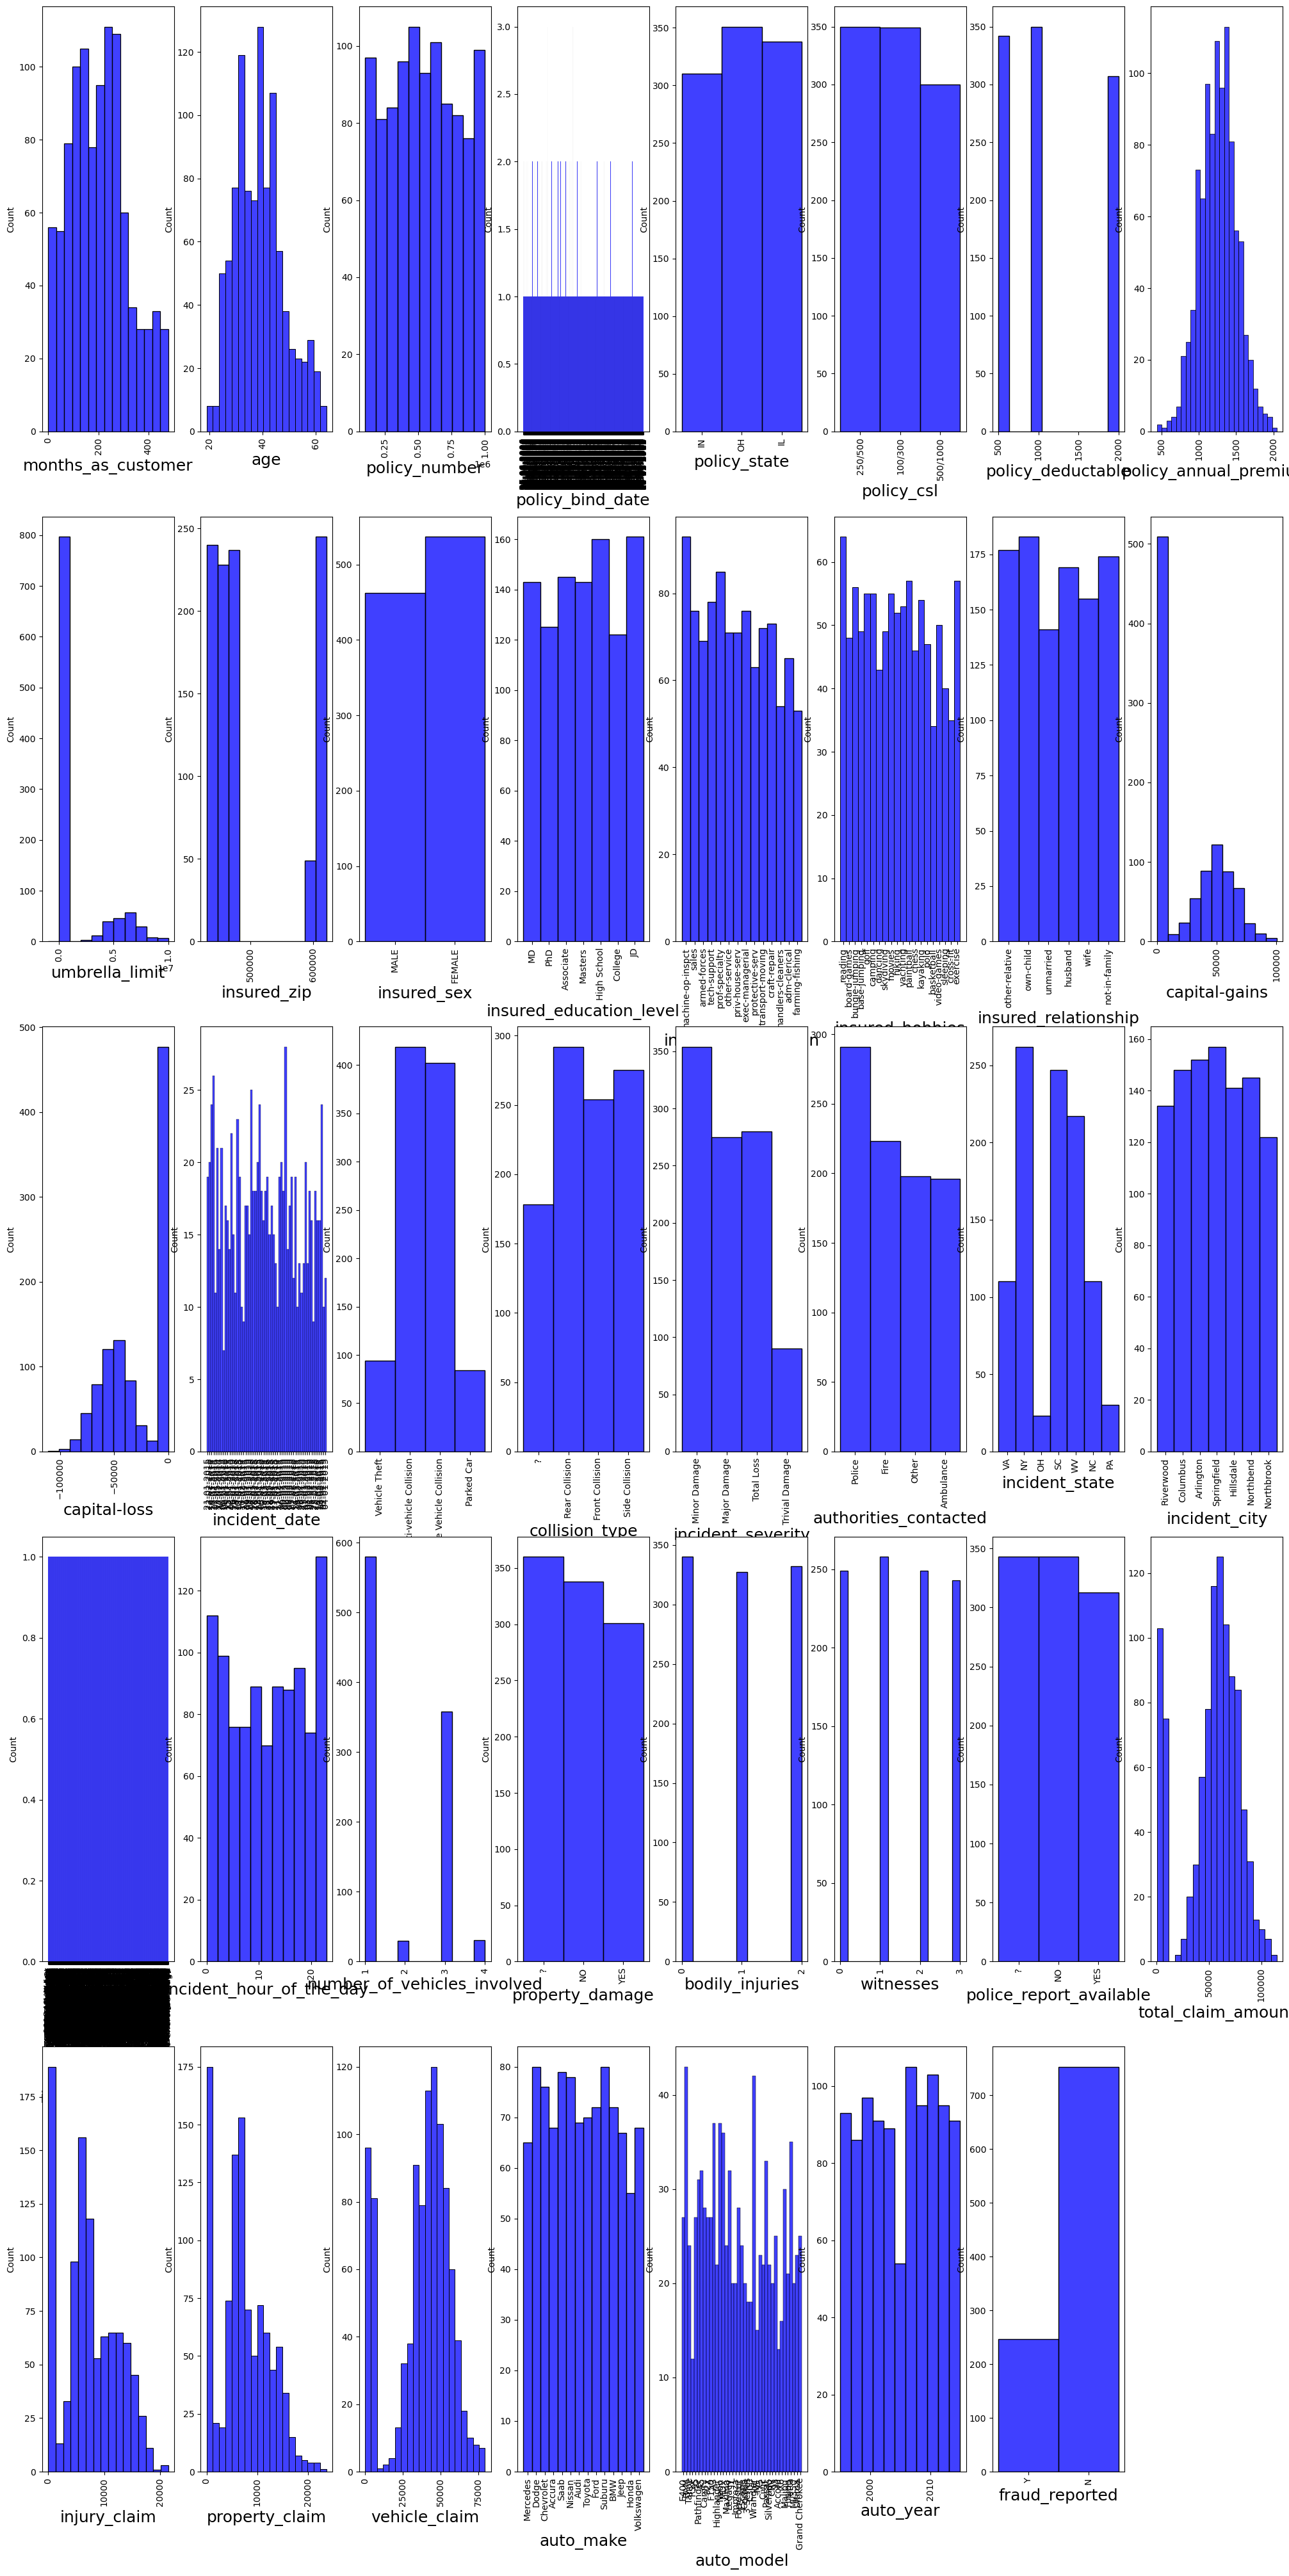

In [437]:
#Getting a graphical view of value counts for each column
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=40:
        ax = plt.subplot(5,8,plotnumber)
        sns.histplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=18)
        plt.xticks(rotation=90, fontsize=10)
        
    plotnumber +=1
plt.show()

In [440]:
#checking for null values
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

<Axes: >

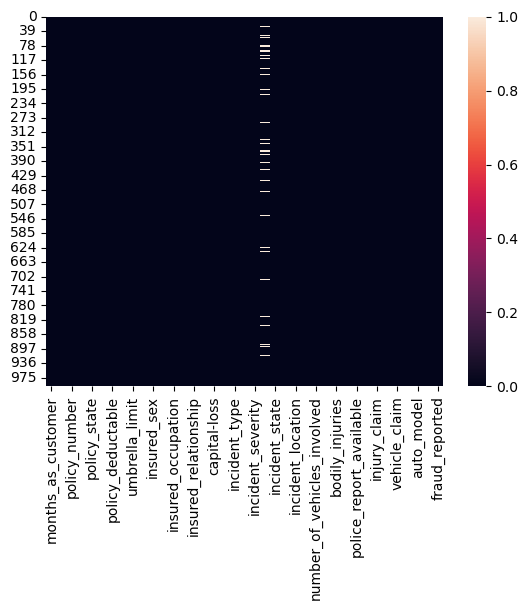

In [441]:
#checking null values using the heatmap
sns.heatmap(df.isnull())

In [442]:
#Fill the null values for authorities_contacted this is object data
df["authorities_contacted"].fillna( method ='ffill', inplace = True)

In [443]:
#checking for null values again
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<Axes: >

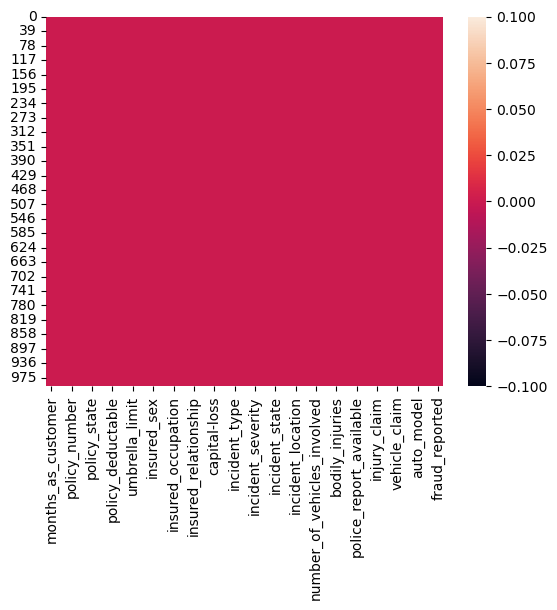

In [444]:
#checking null values using the heatmap again after filling null values
sns.heatmap(df.isnull())

In [445]:
#dropping uneccessary columns.
#policy_number-its a unique policy id label,doesnt affect the target variable
#policy_bind_date will be dropped because months as a customer is enough to understand client loyalty
#insured_hobbies
#insured_zip
#incident_location-this is unique for every incident therefore wont affect our prediction
#incident_date
#umbrella_limit
df = df.drop(columns=['policy_number','insured_hobbies','umbrella_limit','policy_bind_date','incident_location','insured_zip','incident_date'])

In [448]:
#check data shape after dropping some columns
df.shape

(999, 32)

In [449]:
#check information about the data after removing columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_state                 999 non-null    object 
 3   policy_csl                   999 non-null    object 
 4   policy_deductable            999 non-null    int64  
 5   policy_annual_premium        999 non-null    float64
 6   insured_sex                  999 non-null    object 
 7   insured_education_level      999 non-null    object 
 8   insured_occupation           999 non-null    object 
 9   insured_relationship         999 non-null    object 
 10  capital-gains                999 non-null    int64  
 11  capital-loss                 999 non-null    int64  
 12  incident_type                999 non-null    object 
 13  collision_type      

In [450]:
#Dealing with question marks in certain columns
columns_with_questionmark = ['collision_type','property_damage','police_report_available']

In [451]:
#checking mode of columns with question mark
df[columns_with_questionmark].mode()

collision_type property_damage police_report_available
0  Rear Collision               ?                       ?
1             NaN             NaN                      NO

In [452]:
# Replace "?" values in the collision_type column with "Other" if incident_severity is "Trivial Damage" or "Minor Damage"
df.loc[(df['collision_type'] == '?') & (df['incident_severity'].isin(['Trivial Damage', 'Minor Damage'])), 'collision_type'] = 'Other'

# Replace "?" values in the police_report_available column with "YES" if authorities_contacted is "Police", "Ambulance", or "Fire", otherwise replace with "NO"
df.loc[(df['police_report_available'] == '?') & (df['authorities_contacted'].isin(['Police', 'Ambulance', 'Fire'])), 'police_report_available'] = 'YES'
df.loc[(df['police_report_available'] == '?') & ~(df['authorities_contacted'].isin(['Police', 'Ambulance', 'Fire'])), 'police_report_available'] = 'NO'

# Replace "?" values in the property_damage column with "YES" if property_claim exists, otherwise replace with "NO"
df.loc[(df['property_damage'] == '?') & (df['property_claim'] > 0), 'property_damage'] = 'YES'
df.loc[(df['property_damage'] == '?') & (df['property_claim'] == 0), 'property_damage'] = 'NO'

In [453]:
#checking mode of columns after removing question marks
df[columns_with_questionmark].mode()

collision_type property_damage police_report_available
0  Rear Collision             YES                     YES

In [454]:
#Checking unique values of each columns
df.nunique().to_frame("No. of Unique values")#I can clearly see the number of uniques values per each column

No. of Unique values
months_as_customer                            391
age                                            46
policy_state                                    3
policy_csl                                      3
policy_deductable                               3
policy_annual_premium                         990
insured_sex                                     2
insured_education_level                         7
insured_occupation                             14
insured_relationship                            6
capital-gains                                 338
capital-loss                                  354
incident_type                                   4
collision_type                                  4
incident_severity                               4
authorities_contacted                           4
incident_state                                  7
incident_city                                   7
incident_hour_of_the_day                       24
number_of_vehicles_involved                     4
property_damage                                 2
bodily_injuries                                 3
witnesses                                       4
police_report_available                         2
total_claim_amount                            763
injury_claim                                  638
property_claim                                625
vehicle_claim                                 726
auto_make                                      14
auto_model                                     39
auto_year                                      21
fraud_reported                                  2

In [ ]:
#police_report_available -now 2 unique values YES or NO compared to 3 initially
#collision_type-still 4 unique values because I simply replaced '?' into an existing column category
#property damage-now 2 unique values compared to 3 initially

In [455]:
#Statistical summary of numerical columns
df.describe().T

count          mean           std        min  \
months_as_customer           999.0    203.829830    115.103809       0.00   
age                          999.0     38.938939      9.140370      19.00   
policy_deductable            999.0   1136.136136    612.155989     500.00   
policy_annual_premium        999.0   1256.255495    244.243187     433.33   
capital-gains                999.0  25097.897898  27871.869471       0.00   
capital-loss                 999.0 -26820.520521  28105.366259 -111100.00   
incident_hour_of_the_day     999.0     11.650651      6.951671       0.00   
number_of_vehicles_involved  999.0      1.839840      1.019044       1.00   
bodily_injuries              999.0      0.991992      0.820538       0.00   
witnesses                    999.0      1.486486      1.111773       0.00   
total_claim_amount           999.0  52743.073073  26408.011569     100.00   
injury_claim                 999.0   7434.344344   4883.309038       0.00   
property_claim               999.0   7393.943944   4823.859773       0.00   
vehicle_claim                999.0  37914.784785  18890.397013      70.00   
auto_year                    999.0   2005.104104      6.018773    1995.00   

                                   25%       50%       75%        max  
months_as_customer             115.500    199.00    276.00     479.00  
age                             32.000     38.00     44.00      64.00  
policy_deductable              500.000   1000.00   2000.00    2000.00  
policy_annual_premium         1089.185   1257.04   1415.71    2047.59  
capital-gains                    0.000      0.00  51000.00  100500.00  
capital-loss                -51500.000 -24100.00      0.00       0.00  
incident_hour_of_the_day         6.000     12.00     17.00      23.00  
number_of_vehicles_involved      1.000      1.00      3.00       4.00  
bodily_injuries                  0.000      1.00      2.00       2.00  
witnesses                        1.000      1.00      2.00       3.00  
total_claim_amount           41775.000  57970.00  70550.00  114920.00  
injury_claim                  4290.000   6780.00  11310.00   21450.00  
property_claim                4440.000   6750.00  10870.00   23670.00  
vehicle_claim                30275.000  42080.00  50775.00   79560.00  
auto_year                     2000.000   2005.00   2010.00    2015.00

In [ ]:
General view
#from the statistical description above the count of all columns are similar therefore no missing data values
#where mean value of a column is greater than the median(second percentile)the data is skewed to the right.
#where the mean is less than median it means that the data is skewed to the left
#In all columns there are huge differences between the third percentile and max values which signify the existance of outliers in the data. 

Column specific statistical view

months_as_customer- The average  is approximately 203, with a minimum of 0.00 and a maximum of 479
            
age- The average age is 113 ranging  from a minimum of 19 up to a maximum of 64.

policy_deductable- The average  is 113. The minimum values is 500 and maximum value is 2000.
    
policy_annual_premium-The average  is 1256. The minimum values is 433 and maximum value is 2047.

capital-gains-the mean is 25097 with a minimum of 0 and a maximum of 100500

capital-loss-the mean is -26820 with a minimum of -111100 and a maximum of 0

incident_hour_of_the_day-the mean is 11 with a minimum of 0 and a maximum of 23

number_of_vehicles_involved-the mean is 1 with a minimum of 1 and a maximum of 4

bodily_injuries-the mean is 0.99 with a minimum of 0 and a maximum of 2

witnesses-the mean is 1 with a minimum of 0 and a maximum of 3

total_claim_amount-the mean is 52743 with a minimum of 100 and a maximum of 114920

injury_claim-the mean is 7434 with a minimum of 0 and a maximum of 21450

property_claim-the mean is 7.393 with a minimum of 0 and a maximum of 23670

vehicle_claim-the mean is 37914 with a minimum of 70 and a maximum of 79560

auto_year-the mean is 2005 with a minimum of 1195 and a maximum of 2015



In [456]:
#Summary of columns with categorical data
df.describe(include='object')

policy_state policy_csl insured_sex insured_education_level  \
count           999        999         999                     999   
unique            3          3           2                       7   
top              OH    250/500      FEMALE                      JD   
freq            351        350         537                     161   

       insured_occupation insured_relationship            incident_type  \
count                 999                  999                      999   
unique                 14                    6                        4   
top     machine-op-inspct            own-child  Multi-vehicle Collision   
freq                   93                  183                      419   

        collision_type incident_severity authorities_contacted incident_state  \
count              999               999                   999            999   
unique               4                 4                     4              7   
top     Rear Collision      Minor Damage                Police             NY   
freq               292               354                   321            262   

       incident_city property_damage police_report_available auto_make  \
count            999             999                     999       999   
unique             7               2                       2        14   
top      Springfield             YES                     YES     Dodge   
freq             157             654                     578        80   

       auto_model fraud_reported  
count         999            999  
unique         39              2  
top           RAM              N  
freq           43            753

In [457]:
#Similar to numerical data records,there are 999 records under every column label.
#uniques is the number of unique values per column
#top represent the most frequent element per categorical column
#freq denotes freqency of column element quantified in numerical terms

In [458]:
#Split between Categorical and Numerical columns
categorical = ['policy_state', 'policy_csl', 'insured_sex','insured_education_level','insured_occupation','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model','fraud_reported']
numerical = ['months_as_customer', 'age', 'policy_deductable','policy_annual_premium','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']

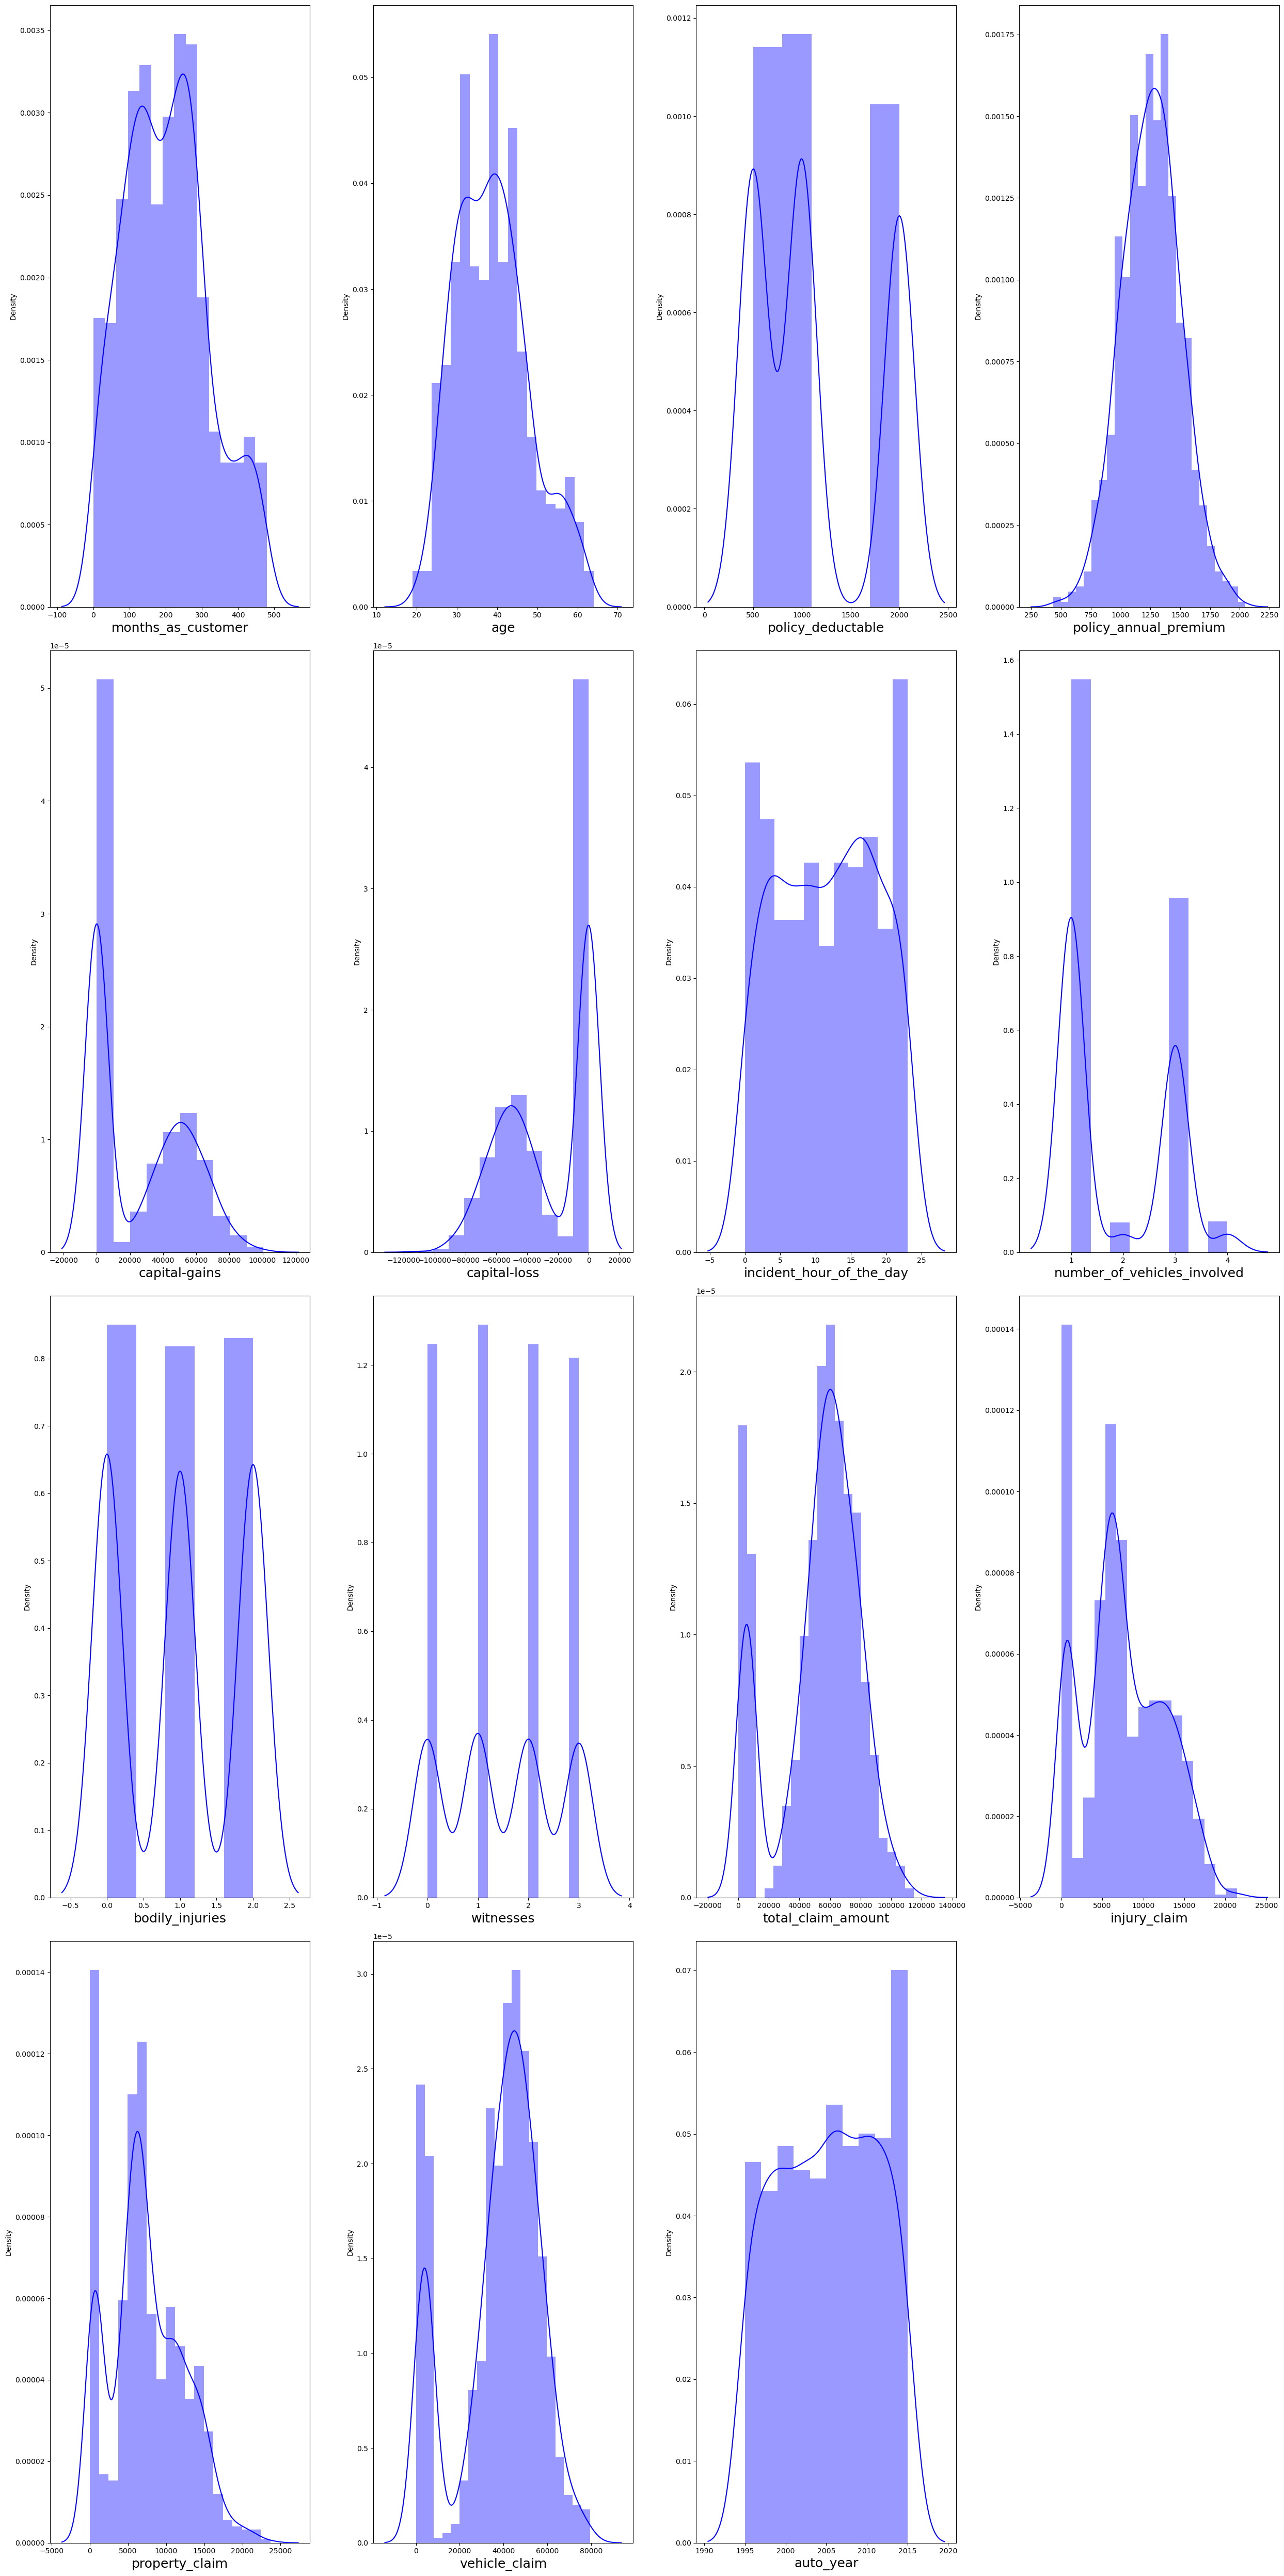

In [459]:
#Checking the distribution of data using distribution plot

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.tight_layout()

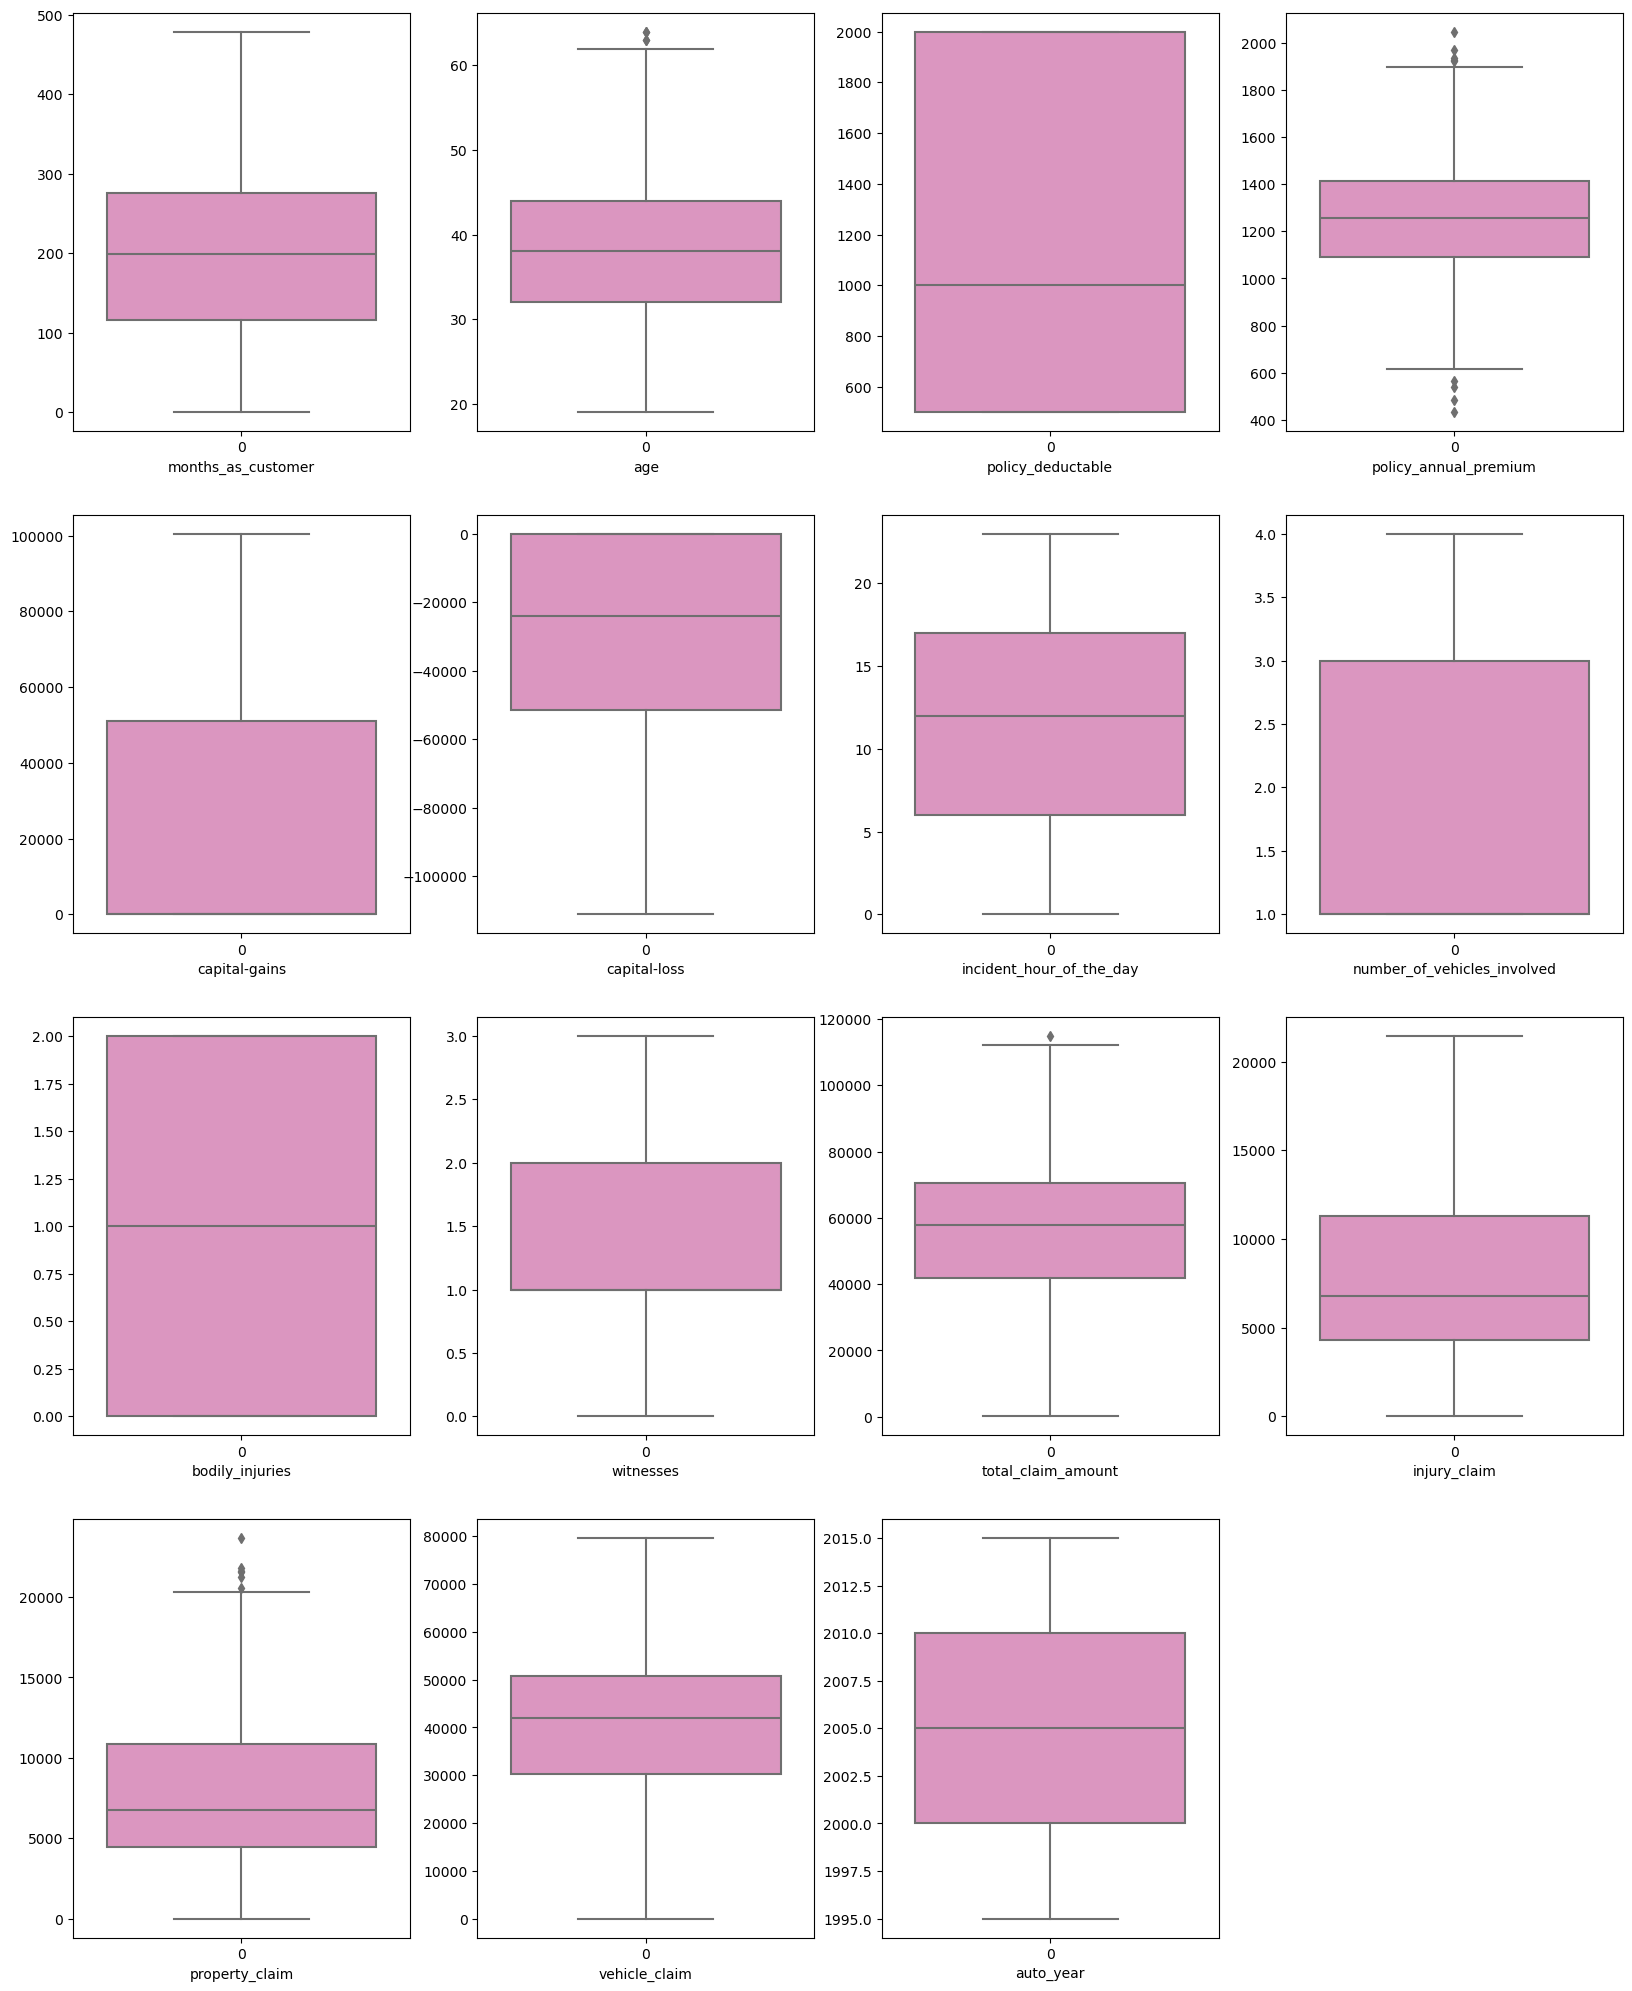

In [460]:
#Let's check data distribution and outliers using boxplot
#I only considered only numerical columns
#Outliers will be dealt with later
plt.figure(figsize=(20,25))
p=1
for column in numerical:
    if p<=16:
        plt.subplot(4,4,p)
        sns.boxplot(df[column], palette ="Set2_r")
        plt.xlabel(column)
        
    p+=1
    
plt.show()

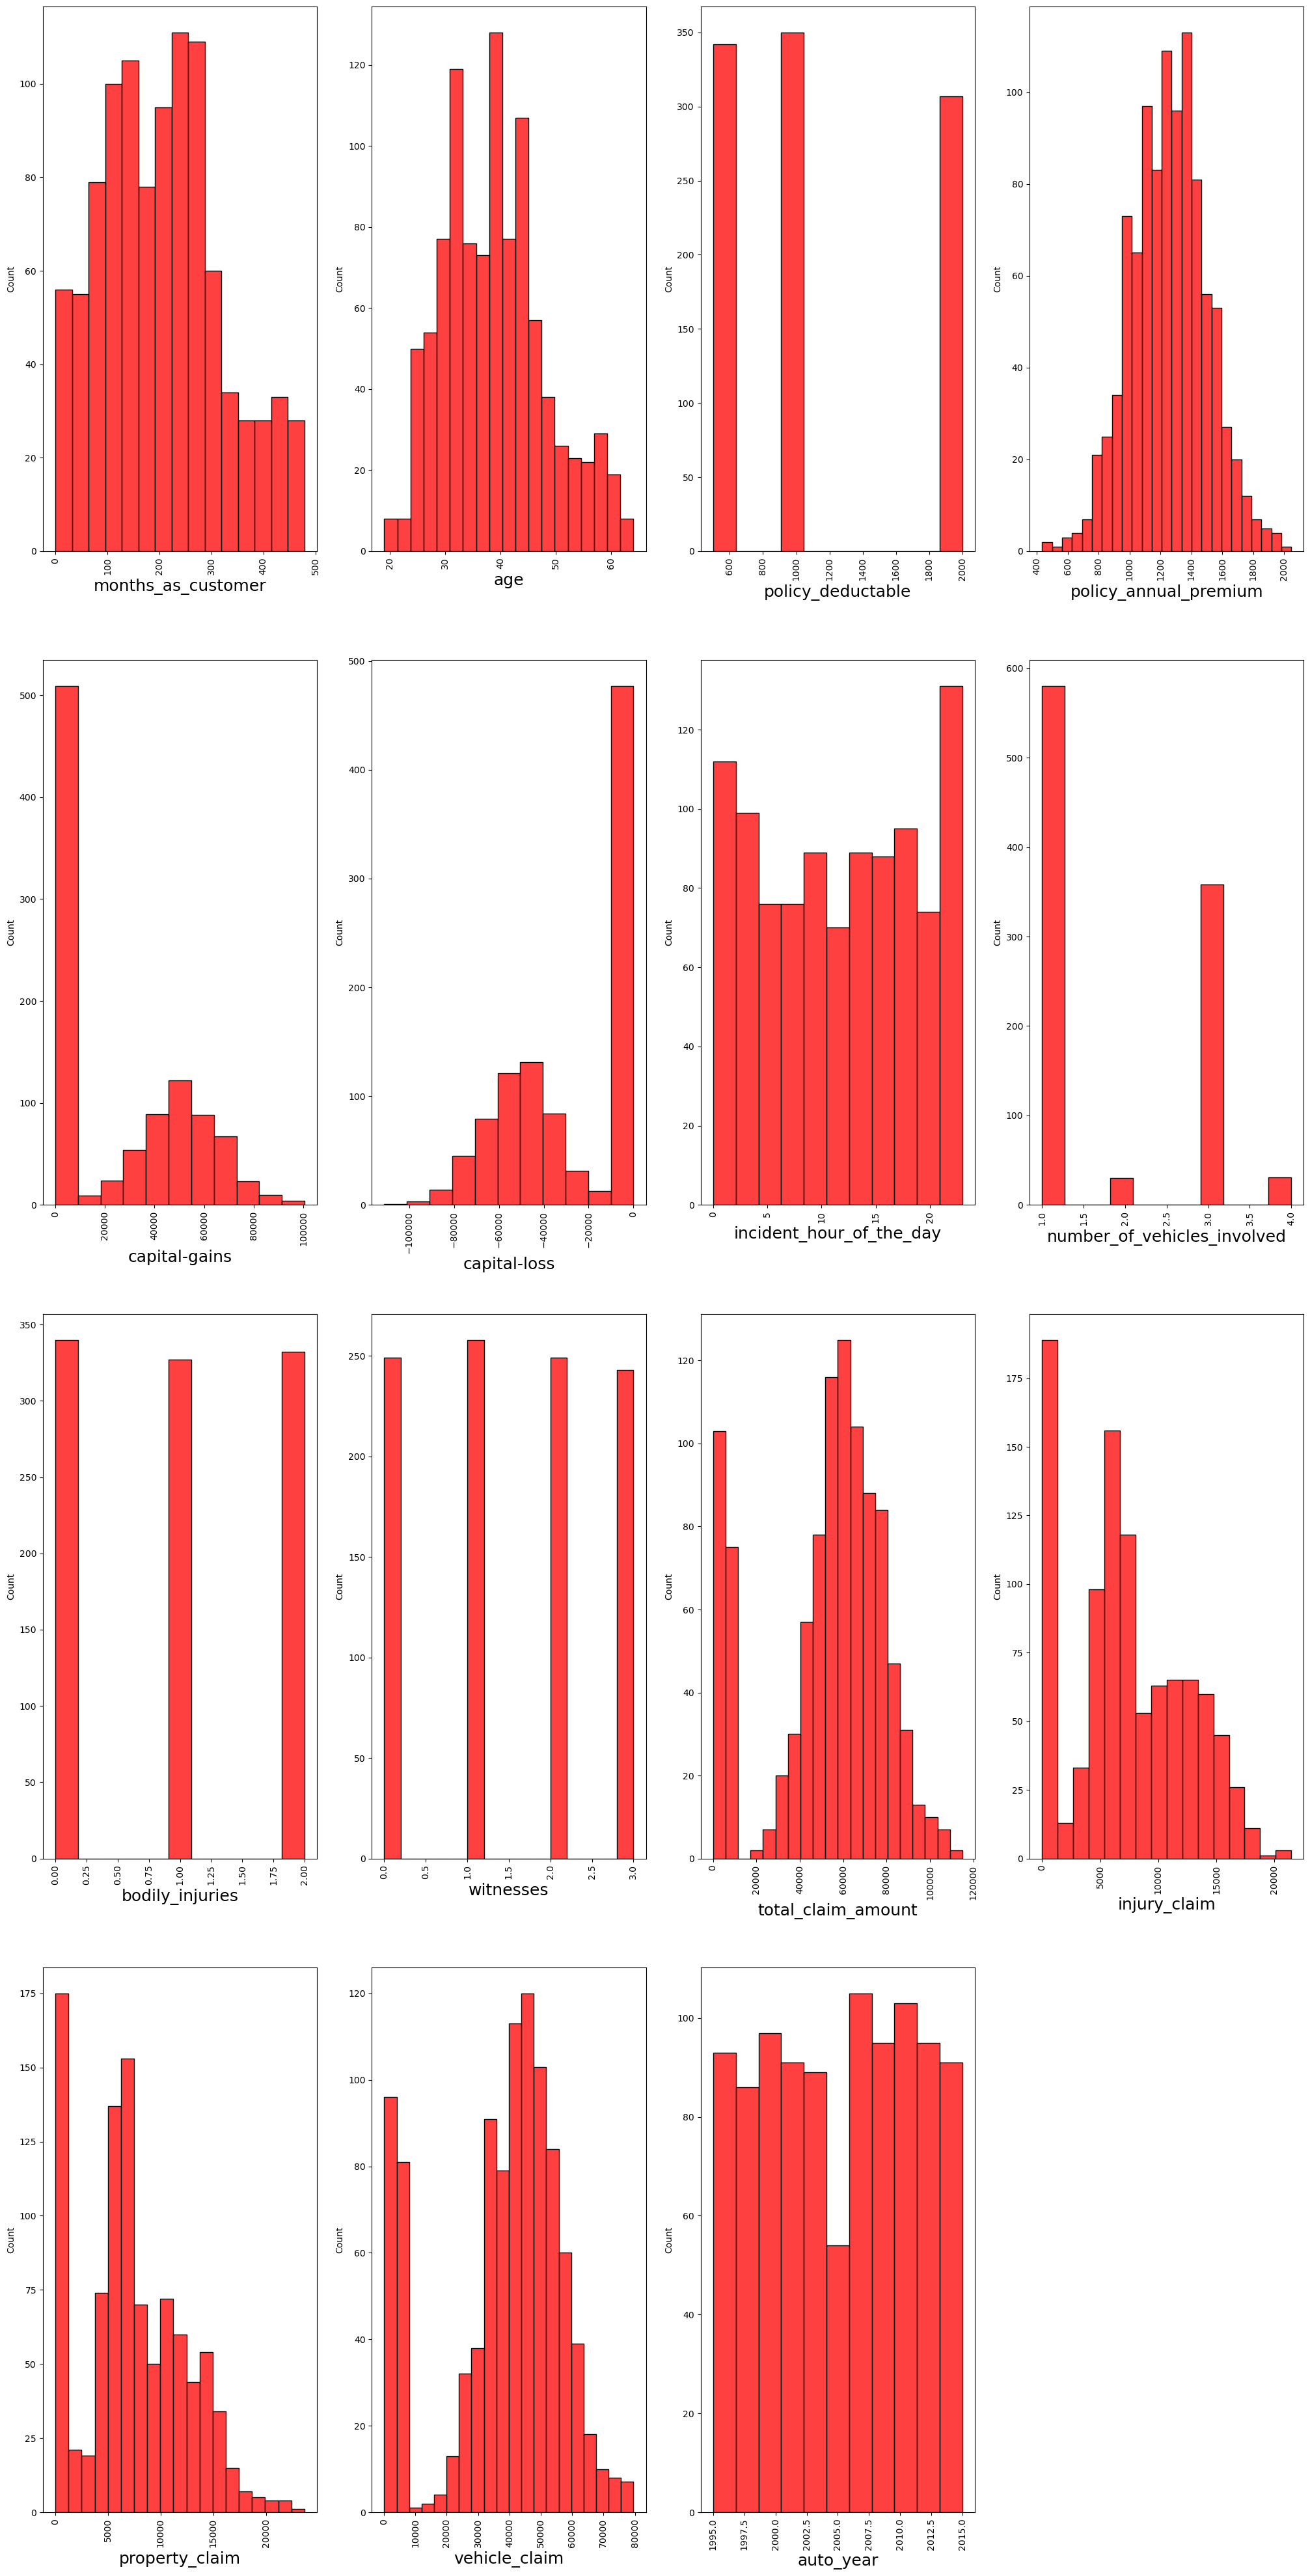

In [461]:
#Univariate analysis for numerical columns
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(df[column], color = 'red')
        plt.xlabel(column,fontsize=18)
        plt.xticks(rotation=90, fontsize=10)
        
    plotnumber +=1
plt.show()

In [ ]:
#Univariate analysis for categorical columns

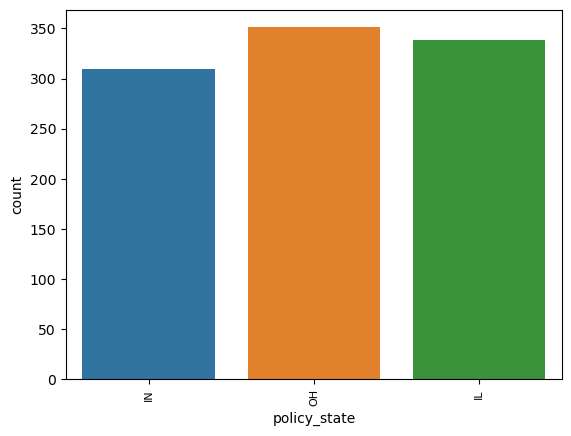

In [462]:
ax=sns.countplot(x='policy_state',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

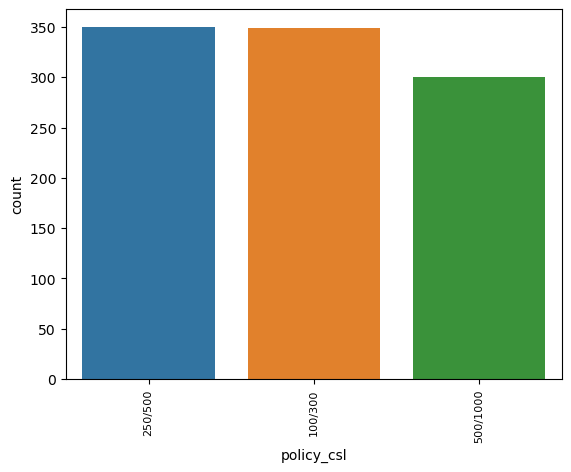

In [463]:
ax=sns.countplot(x='policy_csl',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

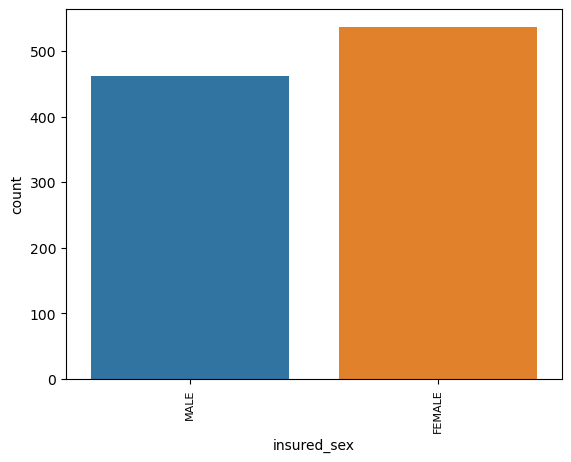

In [464]:
ax=sns.countplot(x='insured_sex',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

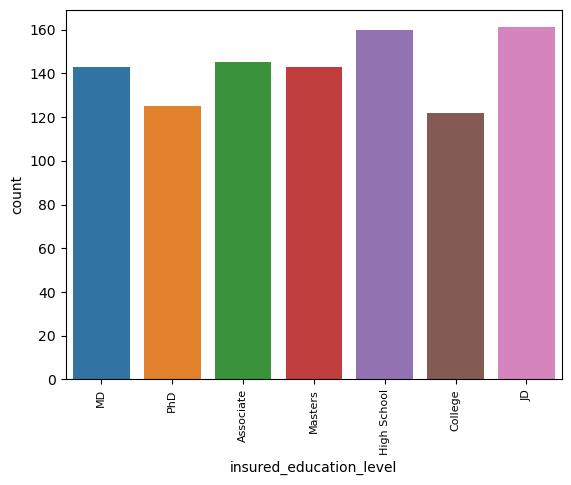

In [465]:
ax=sns.countplot(x='insured_education_level',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

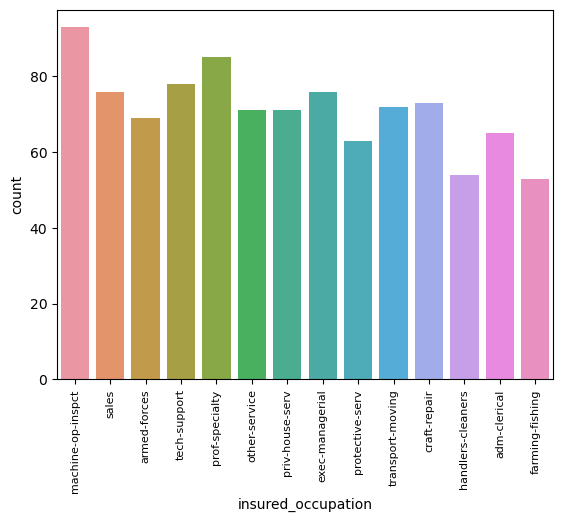

In [466]:
ax=sns.countplot(x='insured_occupation',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

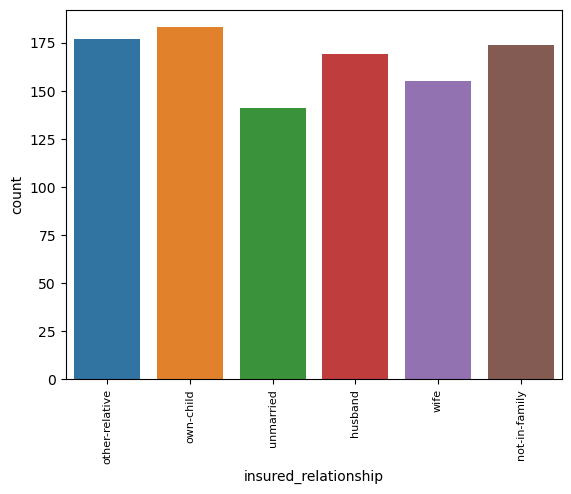

In [467]:
ax=sns.countplot(x='insured_relationship',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

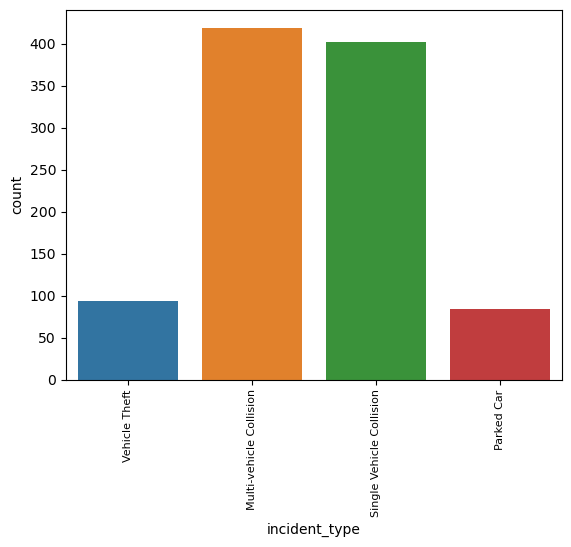

In [468]:
ax=sns.countplot(x='incident_type',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

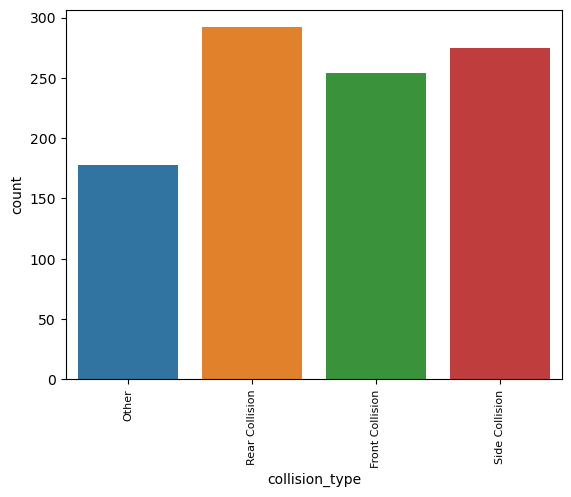

In [469]:
ax=sns.countplot(x='collision_type',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

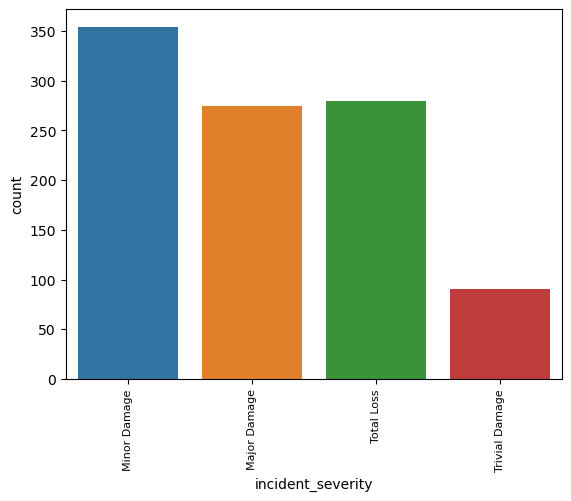

In [470]:
ax=sns.countplot(x='incident_severity',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

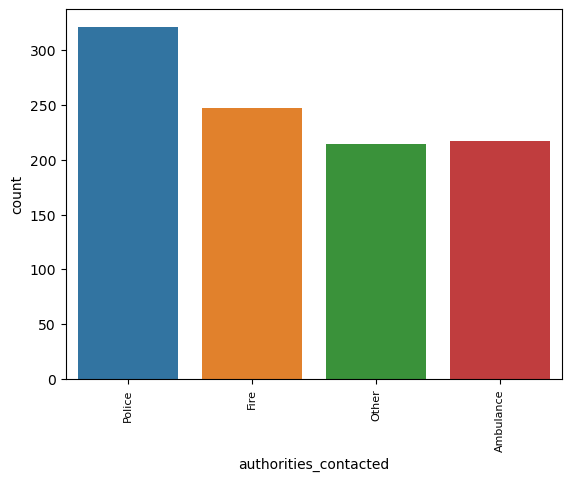

In [471]:
ax=sns.countplot(x='authorities_contacted',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

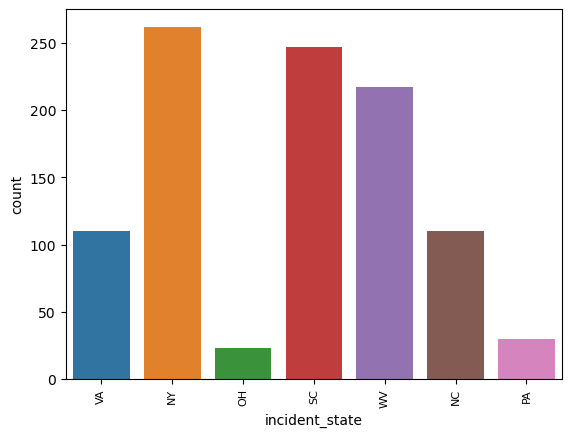

In [472]:
ax=sns.countplot(x='incident_state',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

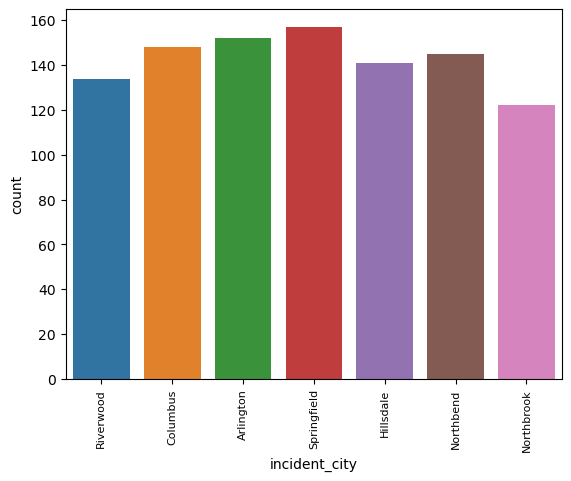

In [473]:
ax=sns.countplot(x='incident_city',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

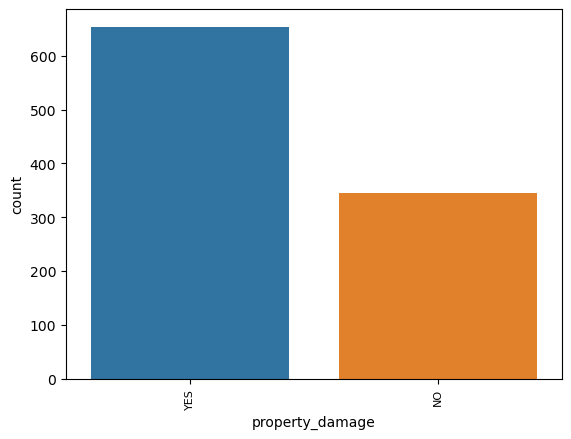

In [474]:
ax=sns.countplot(x='property_damage',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

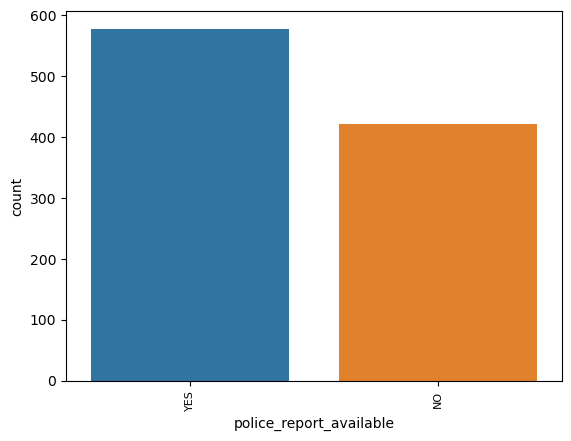

In [475]:
ax=sns.countplot(x='police_report_available',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

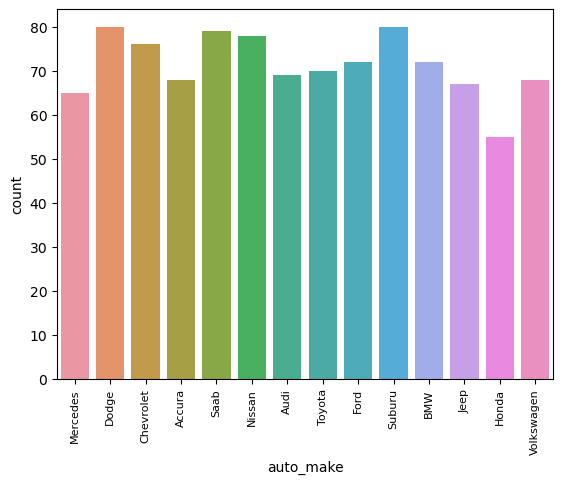

In [476]:
ax=sns.countplot(x='auto_make',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

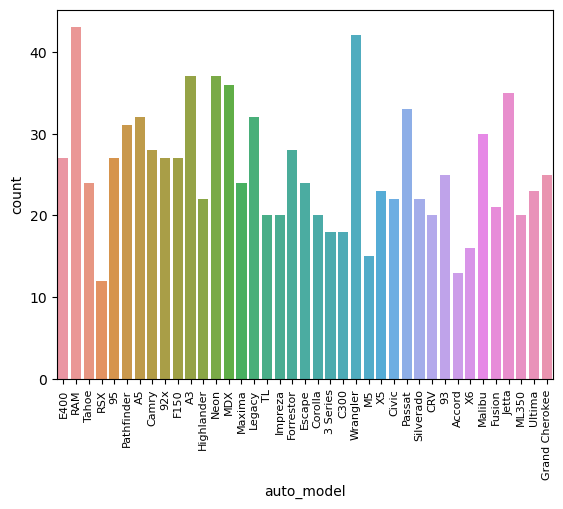

In [477]:
ax=sns.countplot(x='auto_model',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

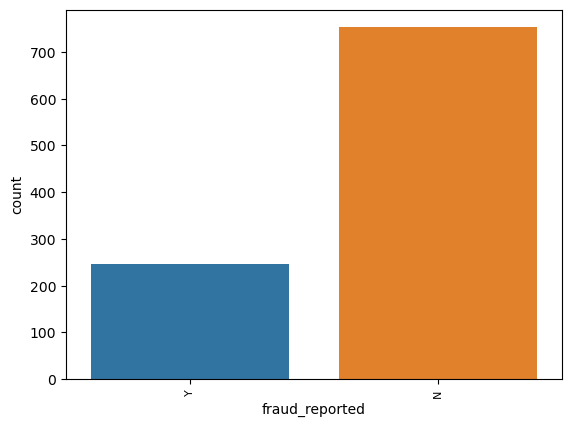

In [478]:
ax=sns.countplot(x='fraud_reported',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

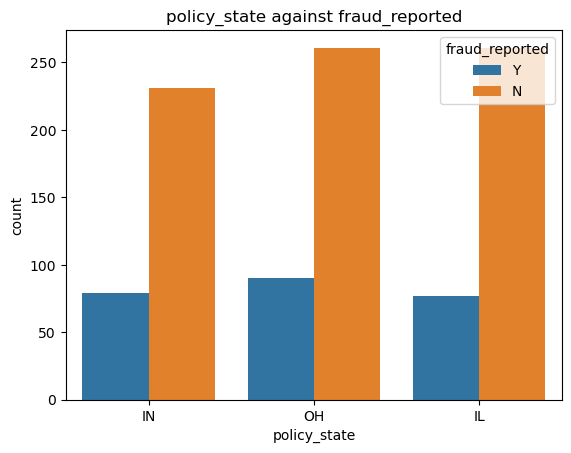

In [479]:
#Bivariate analysis of target variable versus categorical columns
ax= sns.countplot(x='policy_state', hue='fraud_reported',data=df)
plt.title("policy_state against fraud_reported")
plt.show()
#policies in the OH state has both the most reported and unreported fraud

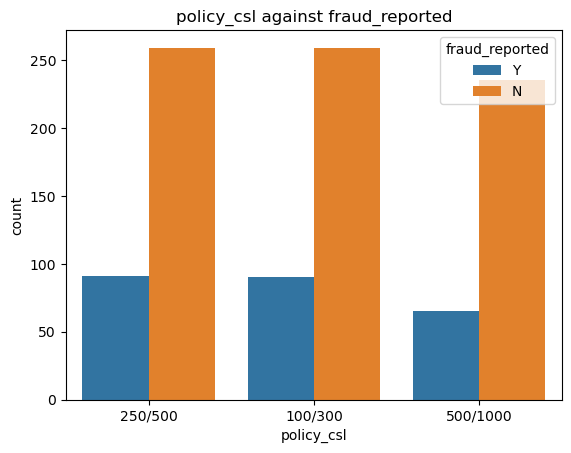

In [480]:
ax= sns.countplot(x='policy_csl', hue='fraud_reported',data=df)
plt.title("policy_csl against fraud_reported")
plt.show()
#plicies with a 250/500 and 100/300 combined single limit respectively have the most reported and unreported fraud

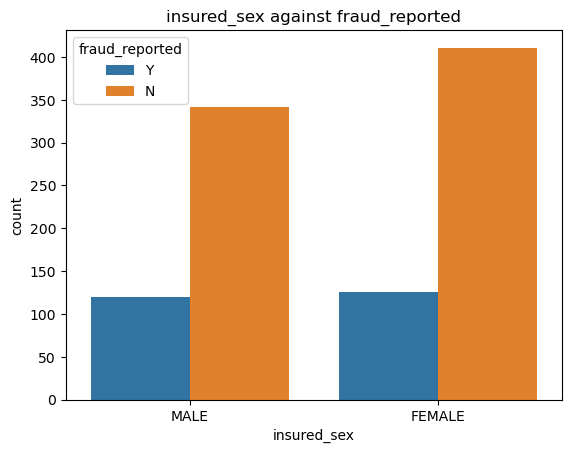

In [481]:
ax= sns.countplot(x='insured_sex', hue='fraud_reported',data=df)
plt.title("insured_sex against fraud_reported")
plt.show()
#female policy hoders have most reported and unreported fraud

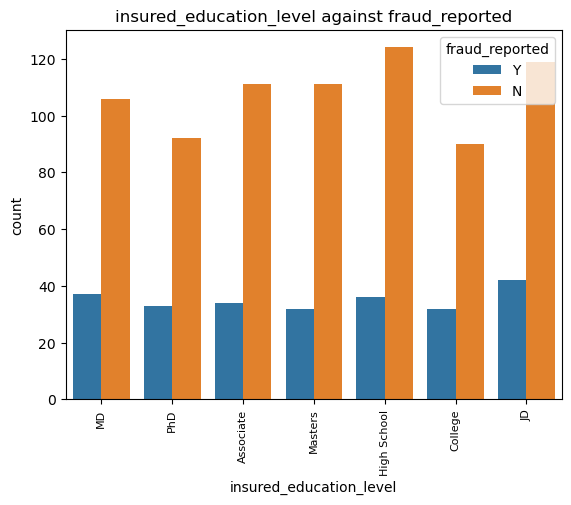

In [482]:
ax= sns.countplot(x='insured_education_level', hue='fraud_reported',data=df)
plt.title("insured_education_level against fraud_reported")
plt.xticks(rotation=90, fontsize=8)
plt.show()
#client holding the JD level of education have the most fraud reported while those with a high school qualification have the most ureported fraud

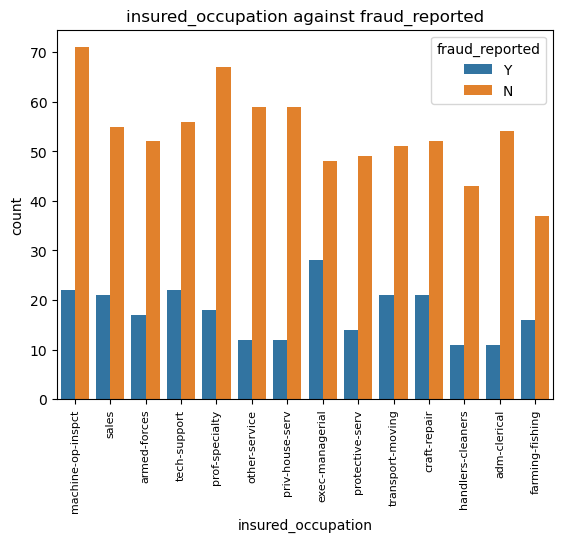

In [483]:
ax= sns.countplot(x='insured_occupation', hue='fraud_reported',data=df)
plt.title("insured_occupation against fraud_reported")
plt.xticks(rotation=90, fontsize=8)
plt.show()
#exec managerial occupation has the most fraud reported while machine operators have the most unreported fraud

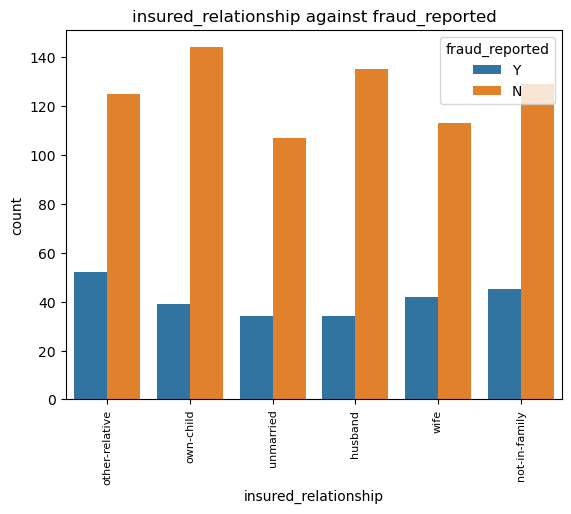

In [484]:
ax= sns.countplot(x='insured_relationship', hue='fraud_reported',data=df)
plt.title("insured_relationship against fraud_reported")
plt.xticks(rotation=90, fontsize=8)
plt.show()
#other relative has the most fraud reported while own child has the most unreported fraud

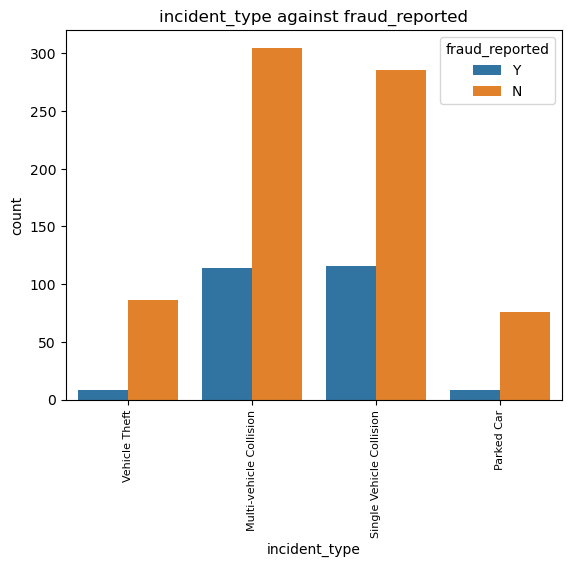

In [485]:
ax= sns.countplot(x='incident_type', hue='fraud_reported',data=df)
plt.title("incident_type against fraud_reported")
plt.xticks(rotation=90, fontsize=8)
plt.show()
#single collision has the most fraud reported while multi collision vehicle incident type has the most unreported fraud

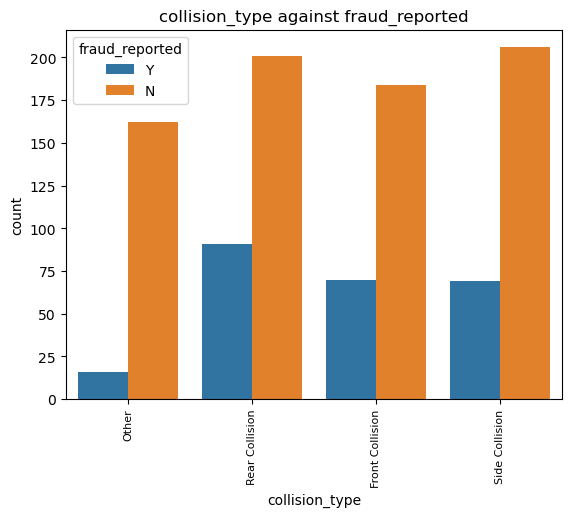

In [486]:
ax= sns.countplot(x='collision_type', hue='fraud_reported',data=df)
plt.title("collision_type against fraud_reported")
plt.xticks(rotation=90, fontsize=8)
plt.show()
#rear collision has the most fraud reported while side collision has the most unreported fraud

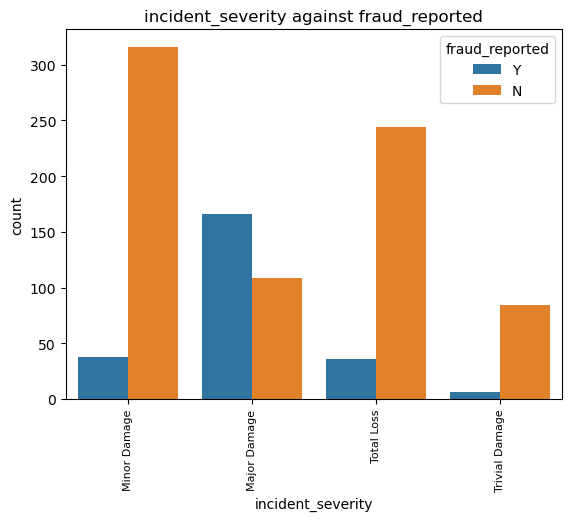

In [487]:
ax= sns.countplot(x='incident_severity', hue='fraud_reported',data=df)
plt.title("incident_severity against fraud_reported")
plt.xticks(rotation=90, fontsize=8)
plt.show()
#major damage has the most fraud reported while minor damages have the most unreported fraud

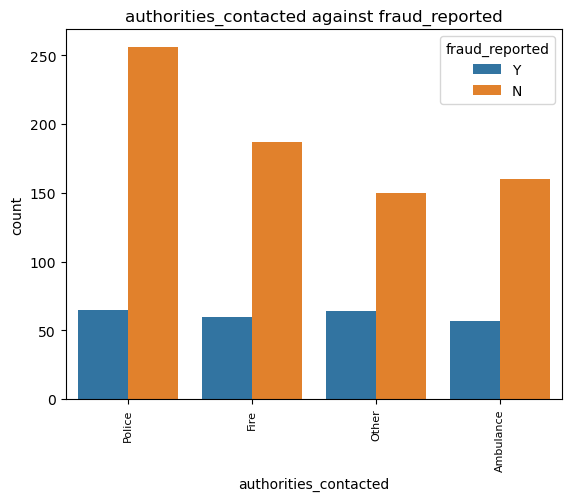

In [488]:
ax= sns.countplot(x='authorities_contacted', hue='fraud_reported',data=df)
plt.title("authorities_contacted against fraud_reported")
plt.xticks(rotation=90, fontsize=8)
plt.show()
#police and other are contacted where most fraud is reported

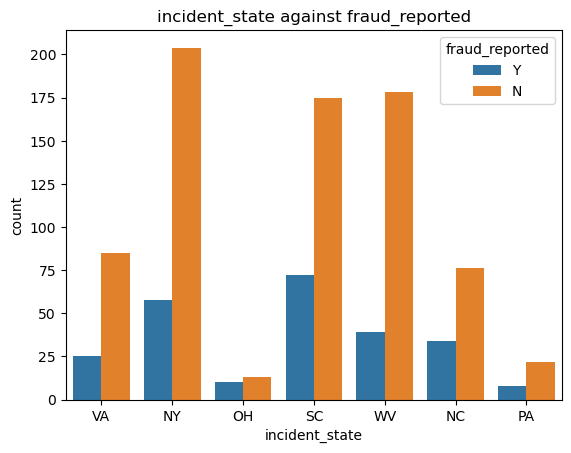

In [489]:
ax= sns.countplot(x='incident_state', hue='fraud_reported',data=df)
plt.title("incident_state against fraud_reported")
plt.show()
#SC state has the most fraud reported while NY state has the most fraued not reported

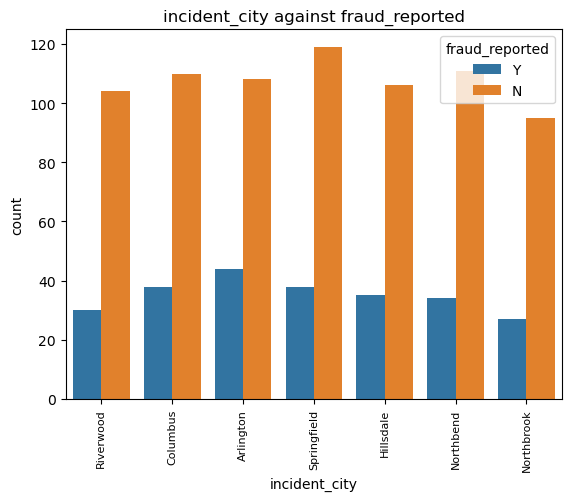

In [490]:
ax= sns.countplot(x='incident_city', hue='fraud_reported',data=df)
plt.title("incident_city against fraud_reported")
plt.xticks(rotation=90, fontsize=8)
plt.show()
#Arlington has the most reported fraud while Springfield has the most fraud not reported

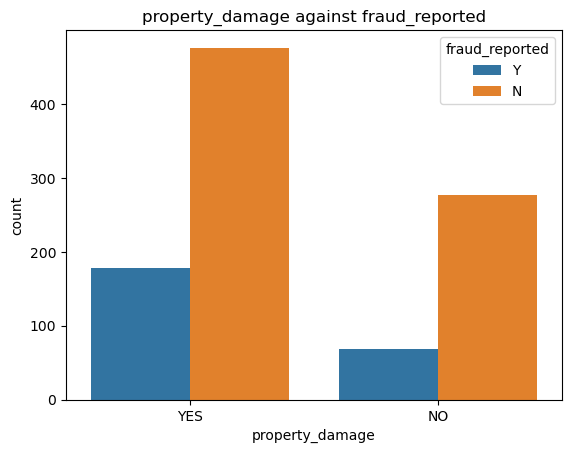

In [491]:
ax= sns.countplot(x='property_damage', hue='fraud_reported',data=df)
plt.title("property_damage against fraud_reported")
plt.show()
#property damage has the most fraud reported and not reported

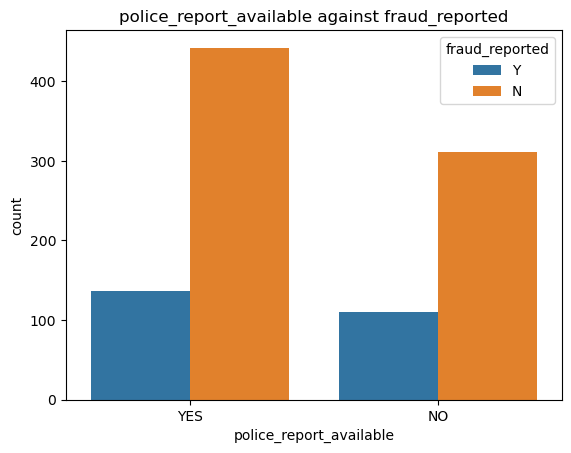

In [492]:
ax= sns.countplot(x='police_report_available', hue='fraud_reported',data=df)
plt.title("police_report_available against fraud_reported")
plt.show()
#police report available  has the most fraud reported and also not reported

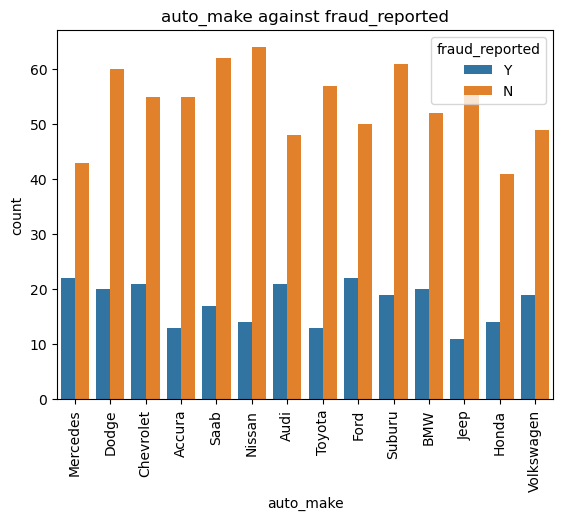

In [493]:
ax= sns.countplot(x='auto_make', hue='fraud_reported',data=df)
plt.title("auto_make against fraud_reported")
plt.xticks(rotation=90, fontsize=10)
plt.show()
#ford has the most fraud reported whie Nissan has the most fraud not reported

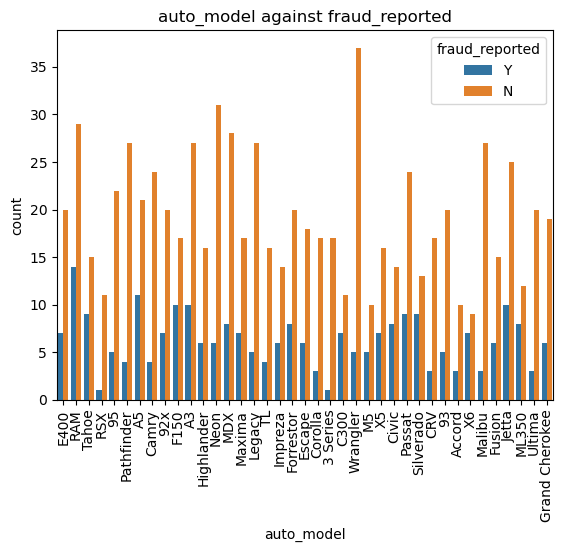

In [494]:
ax= sns.countplot(x='auto_model', hue='fraud_reported',data=df)
plt.title("auto_model against fraud_reported")
plt.xticks(rotation=90, fontsize=10)
plt.show()
#RAM has the most fraud reported and wrangke has the most fraud not reported

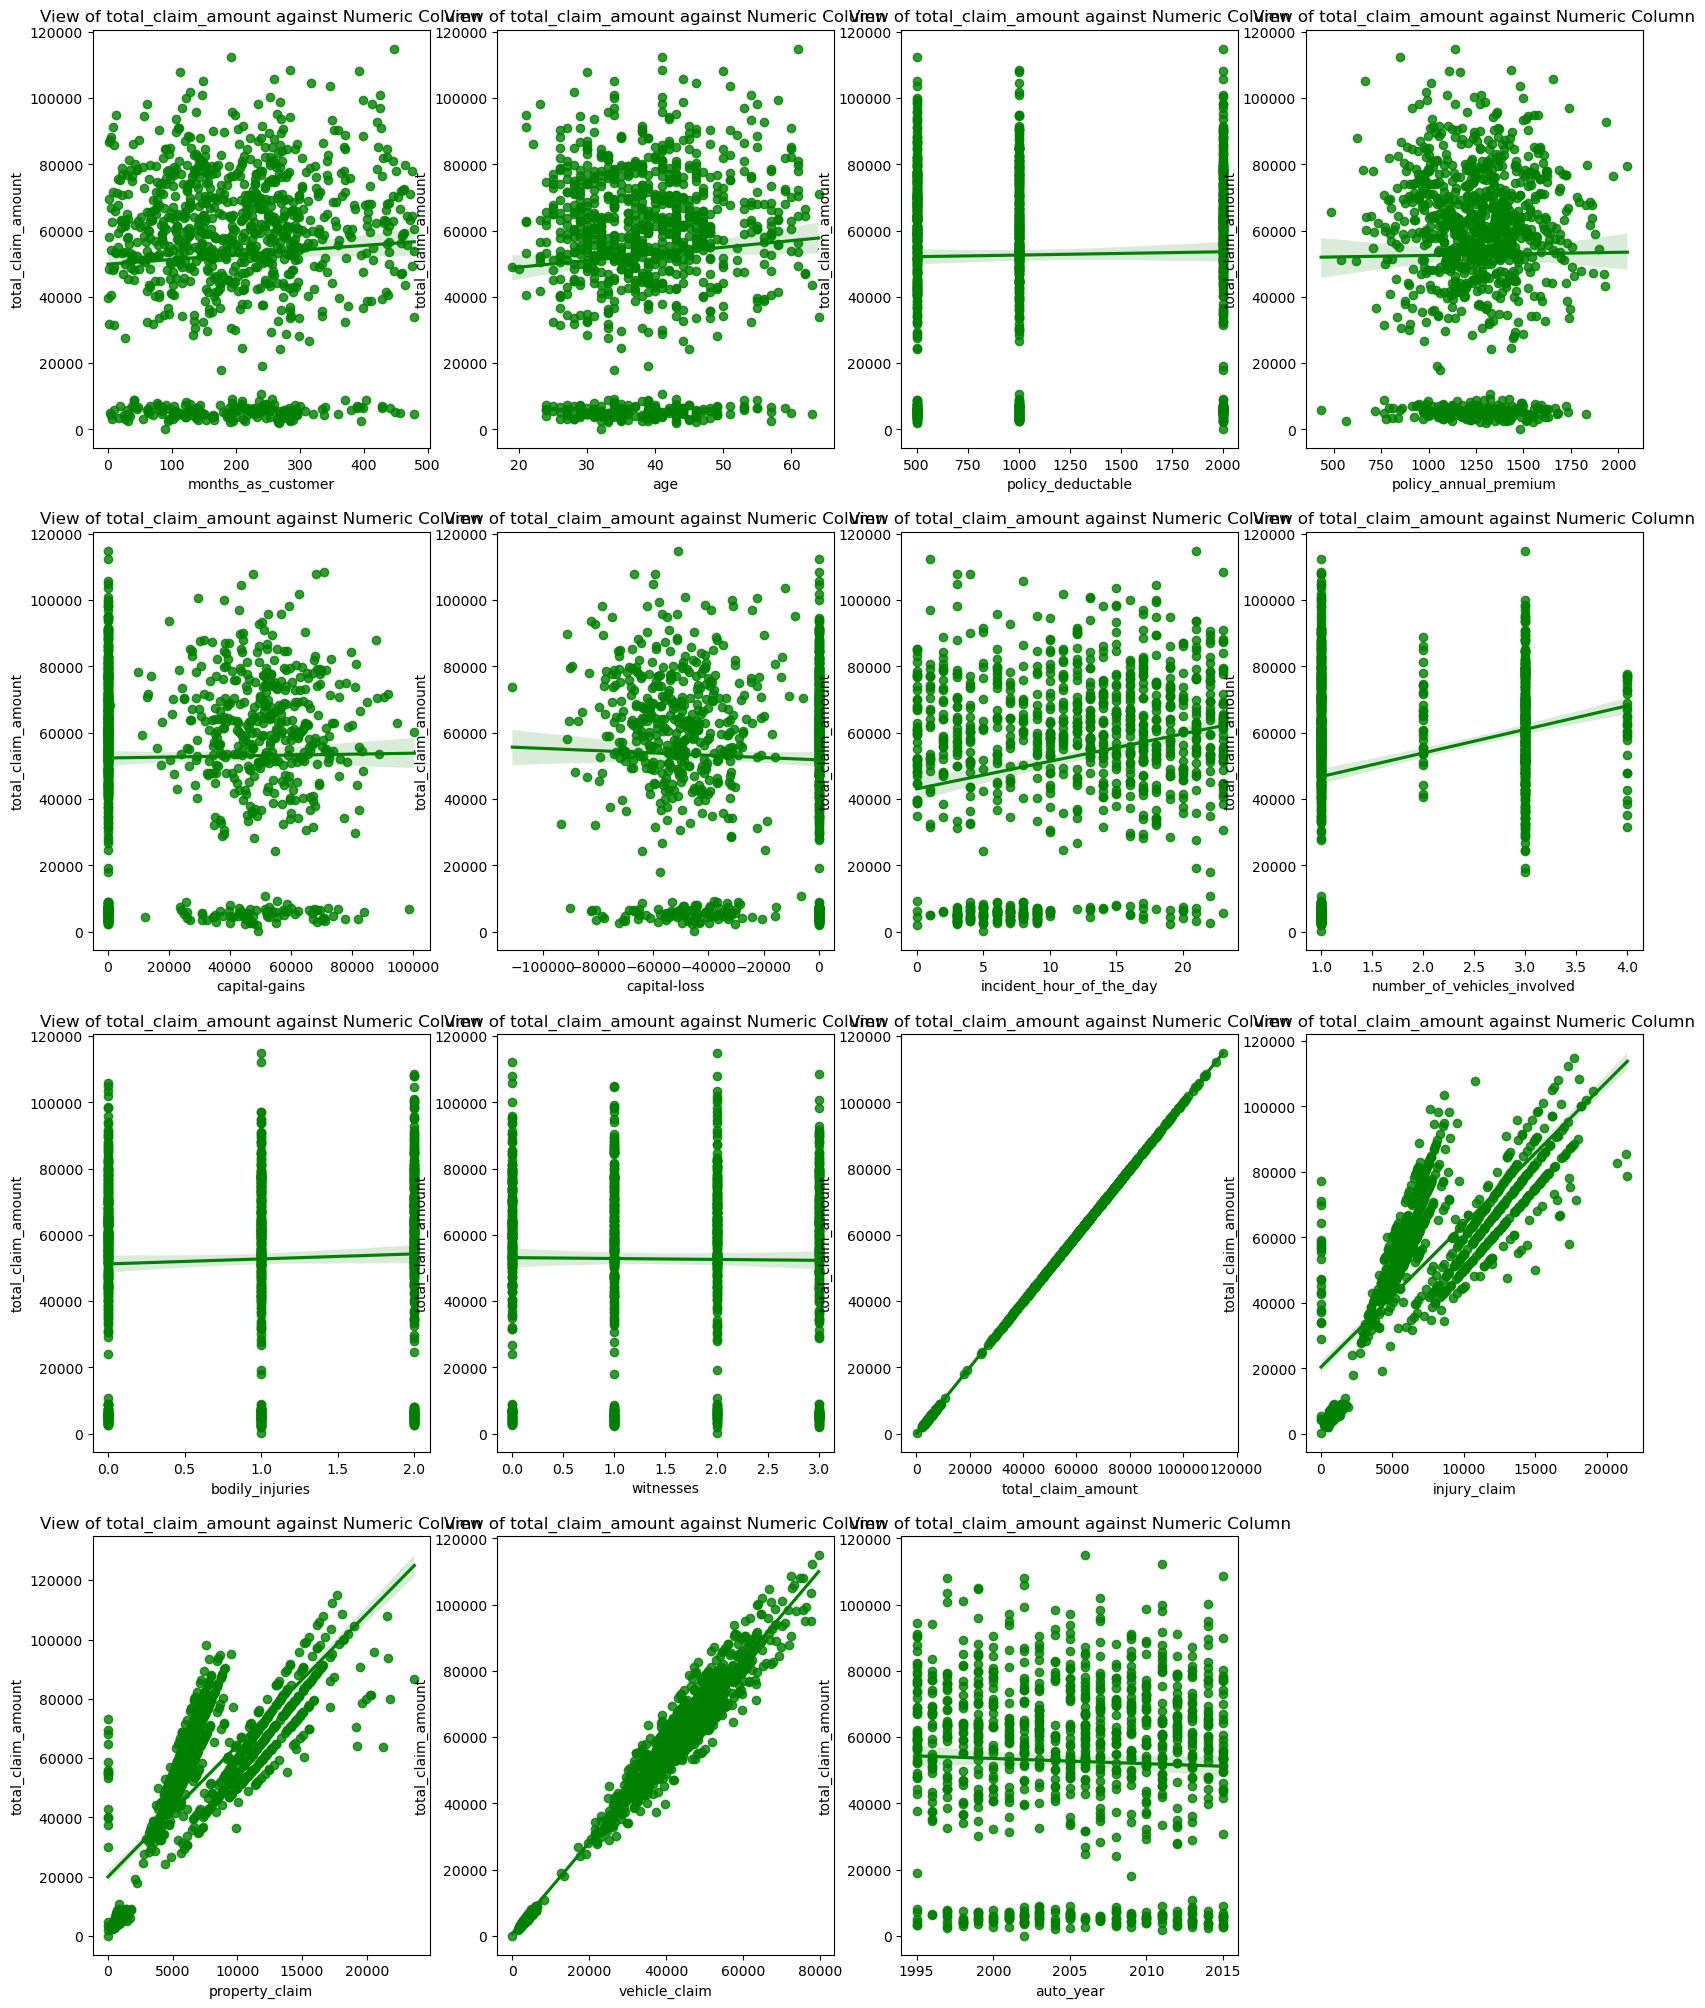

In [495]:
#Bivariate analysis of total_claim_amount versus numerical columns

plt.figure(figsize = (20,25), facecolor = 'white')
p=1

for column in numerical:
    if p<=16:
        plt.subplot(4,4,p)
        sns.regplot(x=df[column],y='total_claim_amount',data=df,color='green')
        plt.title("View of total_claim_amount against Numeric Column")
      
    p+= 1
plt.show()

In [ ]:
#there is a weak positive relationship between total claim amount and age,capital gains,months as a customer,policy deductible and policy annual premium
#there is a negative relationship between total claim amount ,auto year,witnesses,and capital loss
#there is a strong positive relationship between total claim amount and incident hour of the day,number of vehicles involved,injury,property and vehicle claims

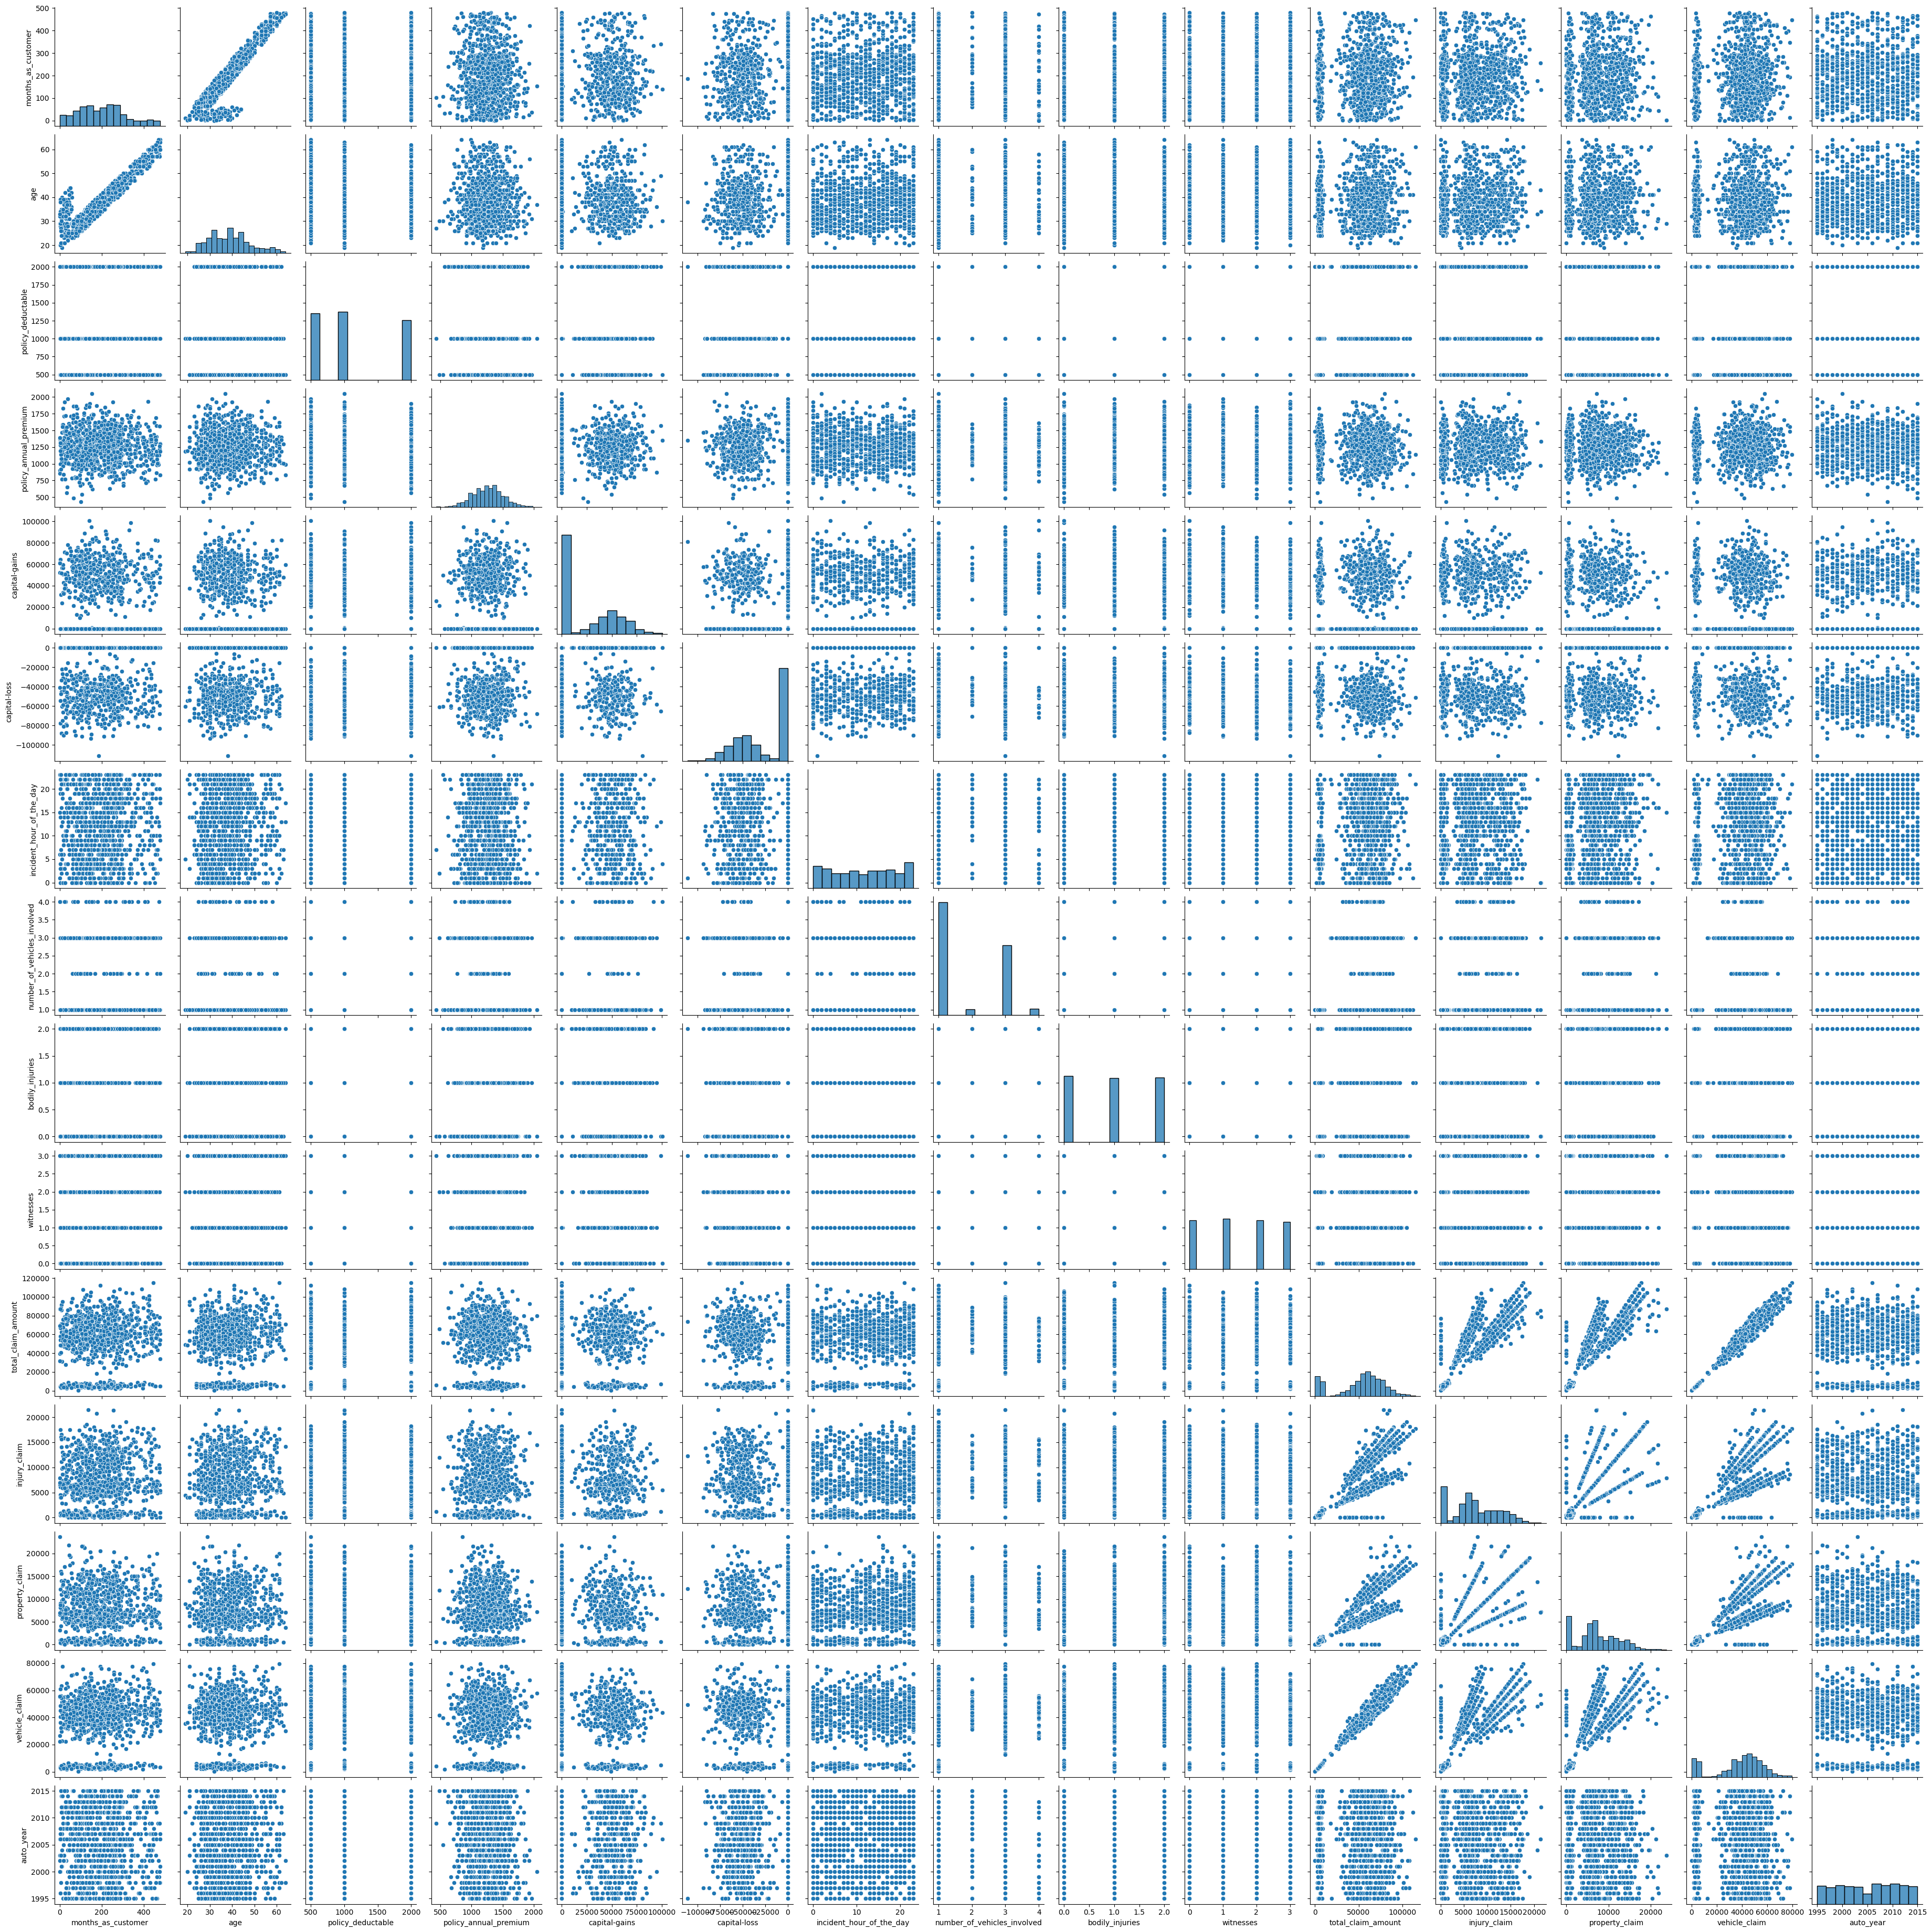

In [496]:
#Multivariate analysis
sns.pairplot(data =df,palette="Dark2")
plt.show()
#the distribution of data is shown in  the middle diagonal column

In [504]:
#Transforming categorical into numerical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['policy_state'] = le.fit_transform(df['policy_state'])

df['policy_csl'] = le.fit_transform(df['policy_csl'])

df['insured_sex'] = le.fit_transform(df['insured_sex'])

df['insured_education_level'] = le.fit_transform(df['insured_education_level'])

df['insured_occupation'] = le.fit_transform(df['insured_occupation'])

df['insured_relationship'] = le.fit_transform(df['insured_relationship'])

df['incident_type'] = le.fit_transform(df['incident_type'])

df['collision_type'] = le.fit_transform(df['collision_type'])

df['incident_severity'] = le.fit_transform(df['incident_severity'])

df['authorities_contacted'] = le.fit_transform(df['authorities_contacted'])

df['incident_state'] = le.fit_transform(df['incident_state'])

df['incident_city'] = le.fit_transform(df['incident_city'])

df['property_damage'] = le.fit_transform(df['property_damage'])

df['police_report_available'] = le.fit_transform(df['police_report_available'])

df['auto_make'] = le.fit_transform(df['auto_make'])

df['auto_model'] = le.fit_transform(df['auto_model'])

df['fraud_reported'] = le.fit_transform(df['fraud_reported'])

df.head(10)




months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 228   42             1           1               2000   
1                 134   29             2           0               2000   
2                 256   41             0           1               2000   
3                 228   44             0           2               1000   
4                 256   39             2           1               1000   
5                 137   34             1           1               1000   
6                 165   37             0           0               1000   
7                  27   33             0           0                500   
8                 212   42             0           0                500   
9                 235   42             2           0                500   

   policy_annual_premium  insured_sex  insured_education_level  \
0                1197.22            1                        4   
1                1413.14            0                        6   
2                1415.74            0                        6   
3                1583.91            1                        0   
4                1351.10            0                        6   
5                1333.35            1                        6   
6                1137.03            1                        0   
7                1442.99            0                        6   
8                1315.68            1                        6   
9                1253.12            0                        5   

   insured_occupation  insured_relationship  ...  witnesses  \
0                   6                     2  ...          0   
1                  11                     3  ...          3   
2                   1                     4  ...          2   
3                  11                     4  ...          1   
4                  12                     4  ...          2   
5                   9                     0  ...          0   
6                  12                     4  ...          2   
7                   7                     3  ...          1   
8                   8                     5  ...          1   
9                   3                     2  ...          2   

   police_report_available  total_claim_amount  injury_claim  property_claim  \
0                        1                5070           780             780   
1                        0               34650          7700            3850   
2                        0               63400          6340            6340   
3                        0                6500          1300             650   
4                        0               64100          6410            6410   
5                        1               78650         21450            7150   
6                        1               51590          9380            9380   
7                        1               27700          2770            2770   
8                        0               42300          4700            4700   
9                        1               87010          7910           15820   

   vehicle_claim  auto_make  auto_model  auto_year  fraud_reported  
0           3510          8          12       2007               1  
1          23100          4          30       2007               0  
2          50720          3          34       2014               1  
3           4550          0          31       2009               0  
4          51280         10           3       2003               1  
5          50050          9          29       2012               0  
6          32830          1           5       2015               0  
7          22160         12           9       2012               0  
8          32900         10           1       1996               0  
9          63280          5          14       2002               0  

[10 rows x 32 columns]

In [505]:
df['policy_state'] = le.fit_transform(df['policy_state'])

df['policy_csl'] = le.fit_transform(df['policy_csl'])

df['insured_sex'] = le.fit_transform(df['insured_sex'])

df['insured_education_level'] = le.fit_transform(df['insured_education_level'])

df['insured_occupation'] = le.fit_transform(df['insured_occupation'])

df['insured_relationship'] = le.fit_transform(df['insured_relationship'])

df['incident_type'] = le.fit_transform(df['incident_type'])

df['collision_type'] = le.fit_transform(df['collision_type'])

df['incident_severity'] = le.fit_transform(df['incident_severity'])

df['authorities_contacted'] = le.fit_transform(df['authorities_contacted'])

df['incident_state'] = le.fit_transform(df['incident_state'])

df['incident_city'] = le.fit_transform(df['incident_city'])

df['property_damage'] = le.fit_transform(df['property_damage'])

df['police_report_available'] = le.fit_transform(df['police_report_available'])

df['auto_make'] = le.fit_transform(df['auto_make'])

df['auto_model'] = le.fit_transform(df['auto_model'])

df['fraud_reported'] = le.fit_transform(df['fraud_reported'])

df.head(10)

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 228   42             1           1               2000   
1                 134   29             2           0               2000   
2                 256   41             0           1               2000   
3                 228   44             0           2               1000   
4                 256   39             2           1               1000   
5                 137   34             1           1               1000   
6                 165   37             0           0               1000   
7                  27   33             0           0                500   
8                 212   42             0           0                500   
9                 235   42             2           0                500   

   policy_annual_premium  insured_sex  insured_education_level  \
0                1197.22            1                        4   
1                1413.14            0                        6   
2                1415.74            0                        6   
3                1583.91            1                        0   
4                1351.10            0                        6   
5                1333.35            1                        6   
6                1137.03            1                        0   
7                1442.99            0                        6   
8                1315.68            1                        6   
9                1253.12            0                        5   

   insured_occupation  insured_relationship  ...  witnesses  \
0                   6                     2  ...          0   
1                  11                     3  ...          3   
2                   1                     4  ...          2   
3                  11                     4  ...          1   
4                  12                     4  ...          2   
5                   9                     0  ...          0   
6                  12                     4  ...          2   
7                   7                     3  ...          1   
8                   8                     5  ...          1   
9                   3                     2  ...          2   

   police_report_available  total_claim_amount  injury_claim  property_claim  \
0                        1                5070           780             780   
1                        0               34650          7700            3850   
2                        0               63400          6340            6340   
3                        0                6500          1300             650   
4                        0               64100          6410            6410   
5                        1               78650         21450            7150   
6                        1               51590          9380            9380   
7                        1               27700          2770            2770   
8                        0               42300          4700            4700   
9                        1               87010          7910           15820   

   vehicle_claim  auto_make  auto_model  auto_year  fraud_reported  
0           3510          8          12       2007               1  
1          23100          4          30       2007               0  
2          50720          3          34       2014               1  
3           4550          0          31       2009               0  
4          51280         10           3       2003               1  
5          50050          9          29       2012               0  
6          32830          1           5       2015               0  
7          22160         12           9       2012               0  
8          32900         10           1       1996               0  
9          63280          5          14       2002               0  

[10 rows x 32 columns]

In [506]:
#Tabular view of Correlation
cor=df.corr()
cor

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922018     -0.001611   
age                                    0.922018  1.000000     -0.015729   
policy_state                          -0.001611 -0.015729      1.000000   
policy_csl                            -0.026901 -0.015253      0.000955   
policy_deductable                      0.027064  0.029423      0.010305   
policy_annual_premium                  0.004355  0.013801      0.011733   
insured_sex                            0.059833  0.072347     -0.021789   
insured_education_level               -0.001407  0.000442     -0.034988   
insured_occupation                     0.011078  0.018390     -0.029879   
insured_relationship                   0.071395  0.076375     -0.016826   
capital-gains                          0.005314 -0.008086      0.073439   
capital-loss                           0.019200  0.006428     -0.031508   
incident_type                         -0.018219 -0.026406      0.030969   
collision_type                        -0.066856 -0.072434      0.056378   
incident_severity                     -0.058301 -0.057262     -0.024917   
authorities_contacted                  0.021547  0.031335     -0.031959   
incident_state                         0.004993  0.005424      0.008312   
incident_city                          0.000909 -0.001338     -0.000934   
incident_hour_of_the_day               0.071746  0.088194      0.030629   
number_of_vehicles_involved            0.015639  0.022938     -0.041327   
property_damage                       -0.006161 -0.006698     -0.021577   
bodily_injuries                       -0.010178 -0.015696      0.013382   
witnesses                              0.057924  0.051932      0.022430   
police_report_available               -0.053296 -0.046755      0.042670   
total_claim_amount                     0.061389  0.069206     -0.006858   
injury_claim                           0.065572  0.075749     -0.046098   
property_claim                         0.033725  0.059812      0.007030   
vehicle_claim                          0.060256  0.061892      0.000535   
auto_make                              0.046775  0.029586      0.016123   
auto_model                             0.005990  0.019010     -0.023346   
auto_year                             -0.000094  0.001536      0.002334   
fraud_reported                         0.018699  0.010433      0.027418   

                             policy_csl  policy_deductable  \
months_as_customer            -0.026901           0.027064   
age                           -0.015253           0.029423   
policy_state                   0.000955           0.010305   
policy_csl                     1.000000           0.003397   
policy_deductable              0.003397           1.000000   
policy_annual_premium          0.023945          -0.003109   
insured_sex                   -0.010829          -0.009499   
insured_education_level        0.009122           0.015338   
insured_occupation             0.015869          -0.047024   
insured_relationship          -0.030006          -0.023289   
capital-gains                  0.005190           0.035456   
capital-loss                  -0.034686          -0.023343   
incident_type                  0.011954          -0.038253   
collision_type                -0.004537          -0.053852   
incident_severity              0.022625          -0.016004   
authorities_contacted          0.058042          -0.002133   
incident_state                 0.032794           0.006596   
incident_city                  0.009396          -0.045353   
incident_hour_of_the_day      -0.001812           0.060752   
number_of_vehicles_involved   -0.019360           0.051050   
property_damage               -0.015496           0.005048   
bodily_injuries               -0.000595          -0.022763   
witnesses                      0.071479           0.066750   
police_report_available       -0.001637           0.034170   
tot

<Axes: >

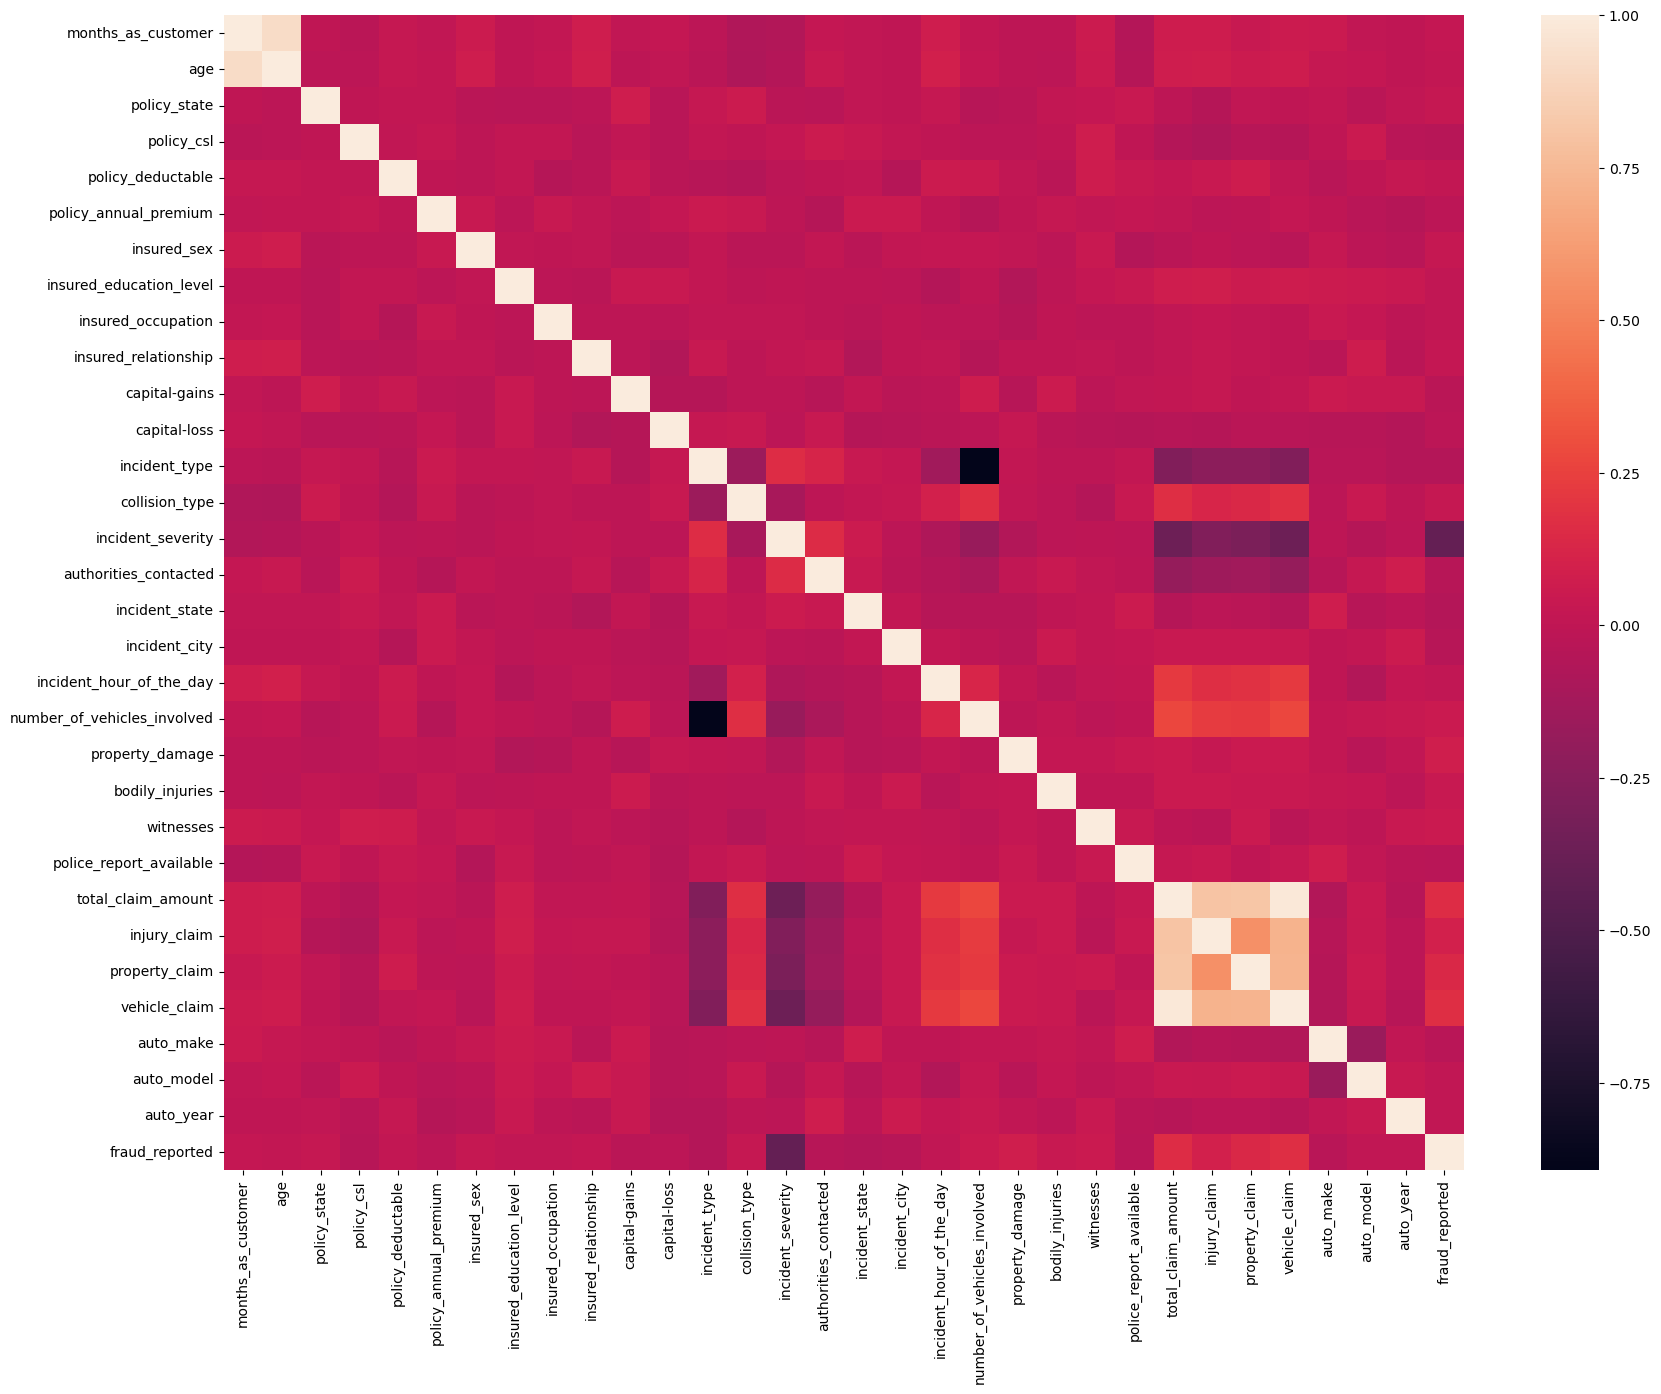

In [508]:
#Visualizing the correlation matrix by plotting heatmap.
f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(df.corr())

In [ ]:
#The table  above demonstrate  multicollinearity which will be dealt with in Standard Scaling and VIF tool

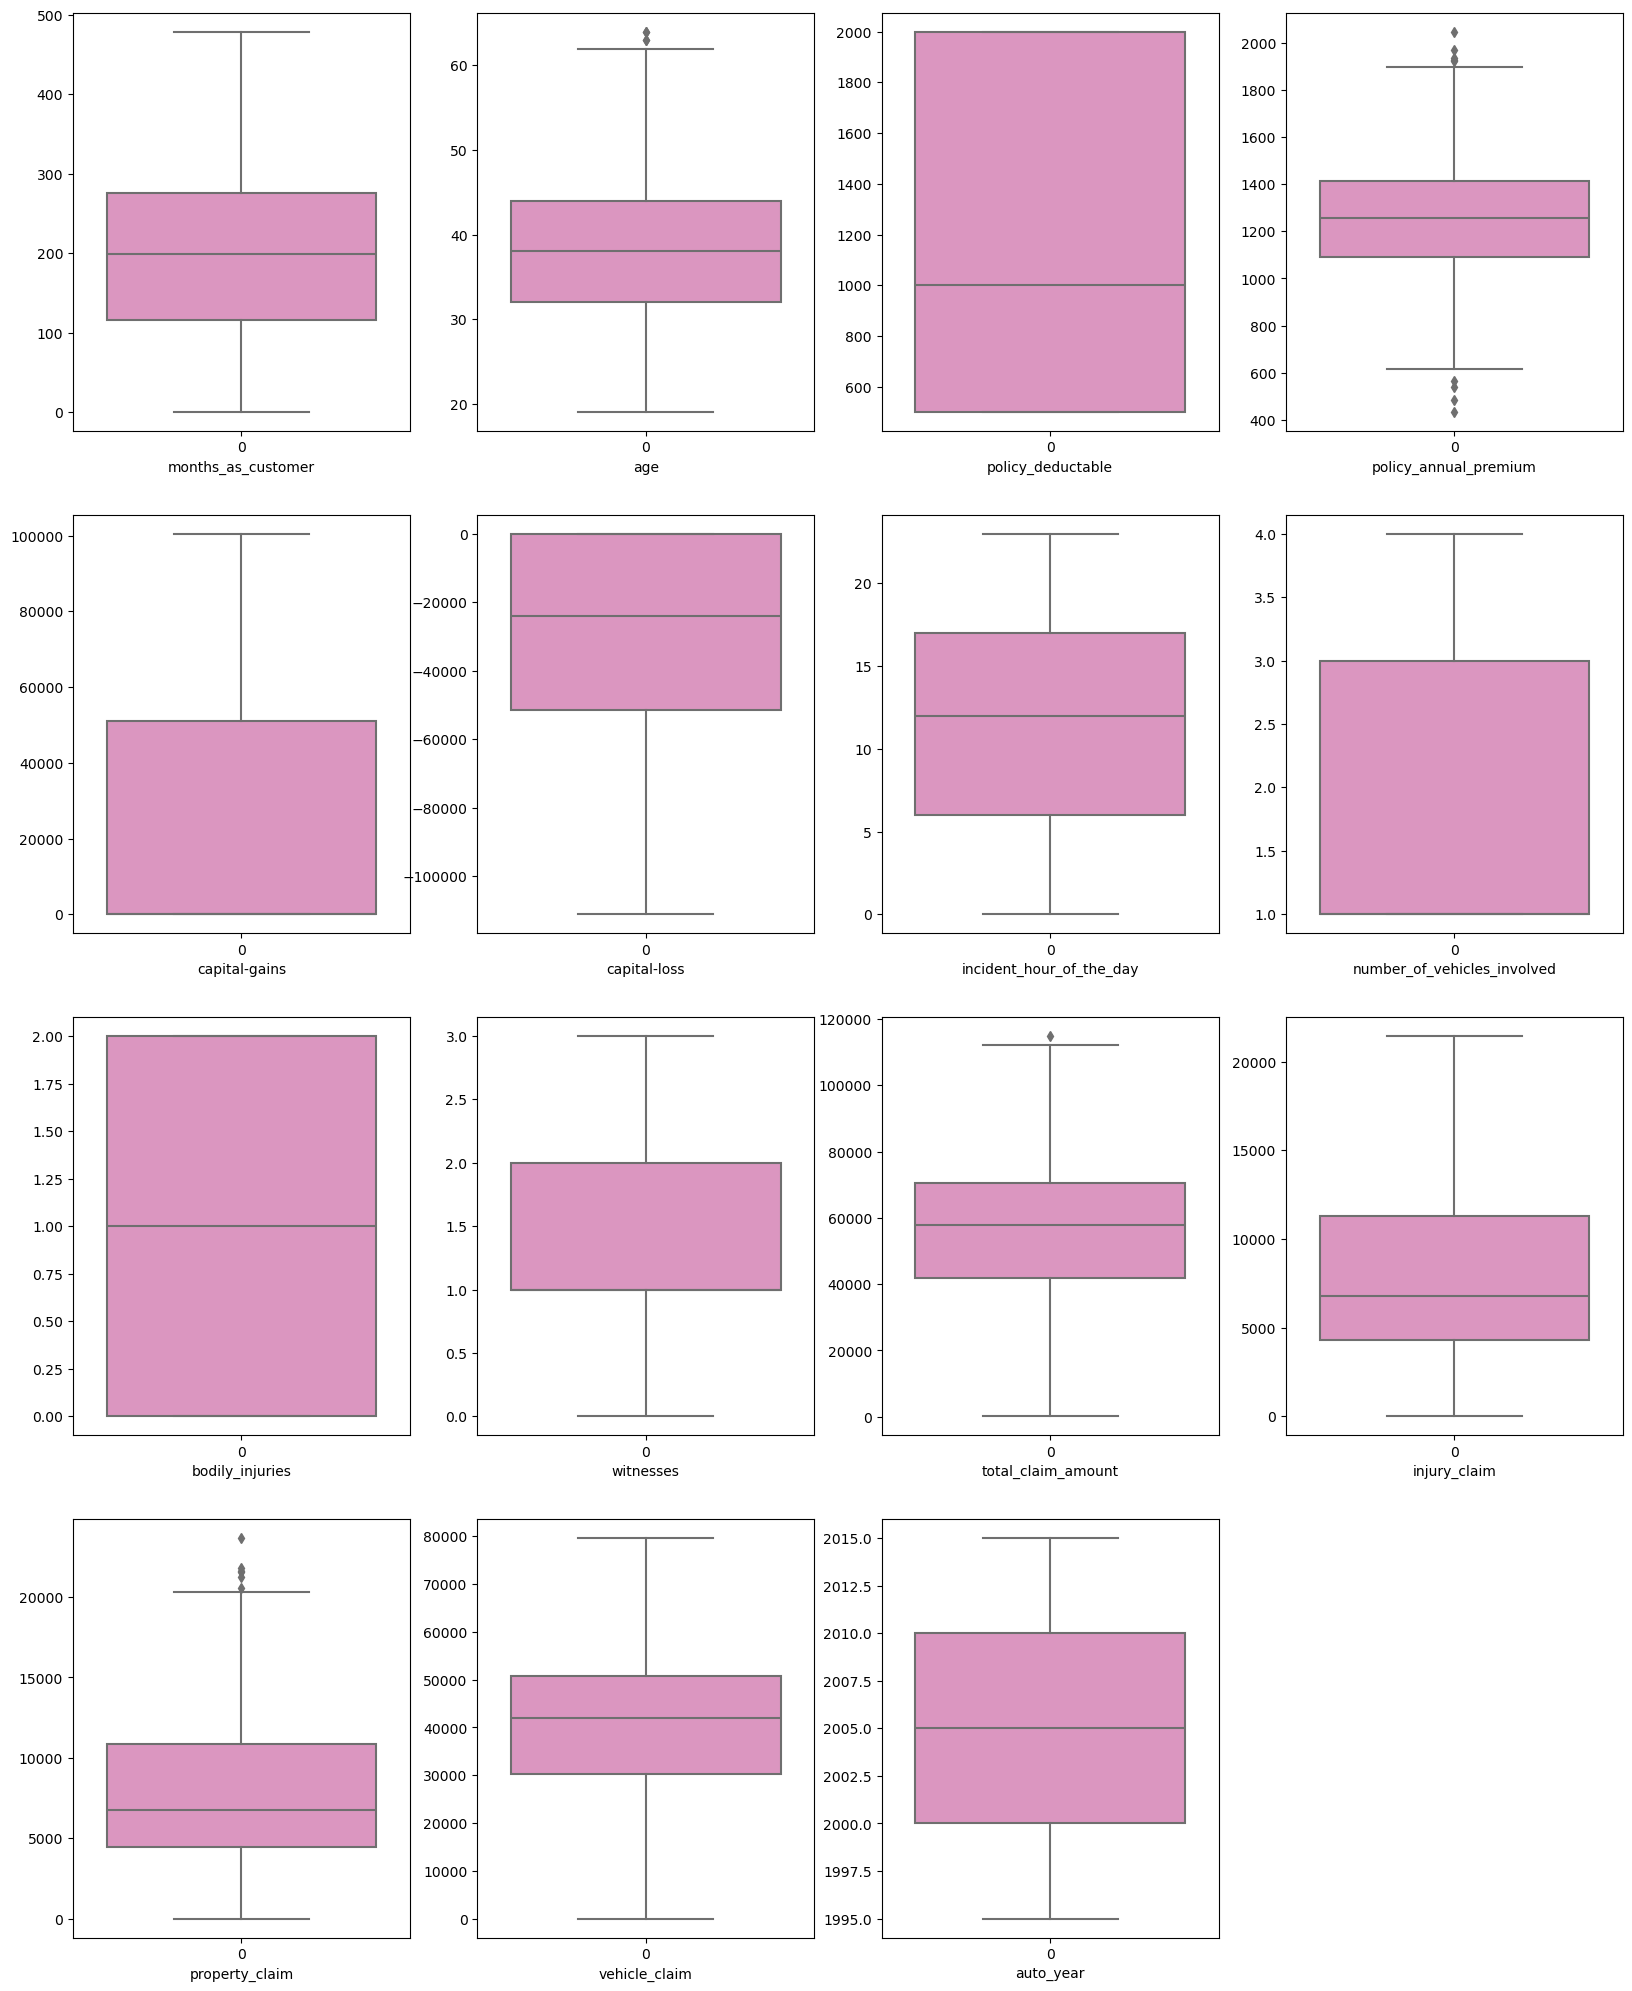

In [509]:
#viewing  outliers using boxplot and dealing with them

plt.figure(figsize=(20,25))
p=1
for column in numerical:
    if p<=16:
        plt.subplot(4,4,p)
        sns.boxplot(df[column], palette ="Set2_r")
        plt.xlabel(column)
        
    p+=1
    
plt.show()

In [510]:
#Remove outliers using zscore method
from scipy.stats import zscore
out_features=df[['months_as_customer','age','policy_deductable','policy_annual_premium','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']]
z=np.abs(zscore(out_features))
z

months_as_customer       age  policy_deductable  policy_annual_premium  \
0              0.210091  0.335062           1.411889               0.241829   
1              0.606972  1.087912           1.411889               0.642651   
2              0.453472  0.225603           1.411889               0.653301   
3              0.210091  0.553982           0.222499               1.342181   
4              0.453472  0.006684           0.222499               0.388514   
..                  ...       ...                ...                    ...   
994            1.745645  0.102776           0.222499               0.223432   
995            0.705544  0.225603           0.222499               0.739529   
996            0.641741  0.540614           1.039694               0.521195   
997            2.209288  2.524254           1.411889               0.412355   
998            2.191904  2.305334           0.222499               2.007470   

     capital-gains  capital-loss  incident_hour_of_the_day  \
0         0.900925      0.954763                  0.525410   
1         0.359040      0.954763                  0.669333   
2         0.854411      1.266566                  0.957177   
3         1.468240      0.682755                  1.201658   
4         0.900925      0.954763                  1.057736   
..             ...           ...                       ...   
994       0.900925      0.954763                  1.201658   
995       1.644132      0.954763                  1.633425   
996       0.359040      0.954763                  1.101100   
997       0.900925      0.954763                  1.388944   
998       0.900925      0.954763                  0.813255   

     number_of_vehicles_involved  bodily_injuries  witnesses  \
0                       0.824557         1.209559   1.337711   
1                       1.139049         1.229087   1.362033   
2                       0.824557         0.009764   0.462118   
3                       0.824557         1.209559   0.437796   
4                       1.139049         1.209559   0.462118   
..                           ...              ...        ...   
994                     0.824557         1.209559   0.437796   
995                     0.824557         1.229087   1.362033   
996                     1.139049         1.229087   1.362033   
997                     0.824557         1.209559   0.437796   
998                     0.824557         1.209559   1.362033   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0              1.806155      1.363354        1.371776       1.822197   
1              0.685479      0.054428        0.735038       0.784642   
2              0.403751      0.224211        0.218595       0.678209   
3              1.751977      1.256815        1.398739       1.767115   
4              0.430272      0.209869        0.204077       0.707868   
..                  ...           ...             ...            ...   
994            1.305444      2.049976        0.275033       1.224792   
995            2.111664      2.181101        2.216360       1.822219   
996            0.559085      0.013452        0.021997       0.772484   
997            0.218341      0.453679        0.450891       0.072813   
998            1.806533      1.428916        1.342739       1.813193   

     auto_year  
0     0.315155  
1     0.315155  
2     1.478765  
3     0.647615  
4     0.349765  
..         ...  
994   0.148925  
995   1.644995  
996   1.513376  
997   1.180916  
998   0.315155  

[999 rows x 15 columns]

In [511]:
#removing the data above zscore and creating new dataframe
df1=df[(z<3).all(axis=1)]
df1.shape

(994, 32)

In [512]:
#shape of old and new dataframe
print("Original Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

Original Data Frame- 999
New Data Frame- 994


In [513]:
print("Data Loss Percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)
#there is a 0.5% data loss when using zscore to remove outliers

Data Loss Percentage- 0.5005005005005005


In [514]:
#making a copy of the dataframe
df=df1.copy()

In [515]:
#checking shape of the data
df.shape

(994, 32)

In [516]:
#Checking for Skewness
df.skew()
#Skeweness is acceptable only within the range of -0.5 and 0.5.
#the columns vehicle_claim,property damage and fraud_reported fall short of that criteria

months_as_customer             0.361402
age                            0.476448
policy_state                  -0.026337
policy_csl                     0.093274
policy_deductable              0.474982
policy_annual_premium          0.034746
insured_sex                    0.145470
insured_education_level        0.002856
insured_occupation            -0.063845
insured_relationship           0.077338
capital-gains                  0.481990
capital-loss                  -0.378032
incident_type                  0.102955
collision_type                -0.175923
incident_severity              0.273656
authorities_contacted         -0.138451
incident_state                -0.145723
incident_city                  0.045817
incident_hour_of_the_day      -0.042279
number_of_vehicles_involved    0.501381
property_damage               -0.648099
bodily_injuries                0.012999
witnesses                      0.028678
police_report_available       -0.318302
total_claim_amount            -0.590215


In [517]:
#Removing skeweness  using the cuberoot method
df.skew()

df['property_damage']=np.cbrt(df['property_damage'])

In [518]:
#check skeweness again
df.skew()
#skeweness is still not within the desired threshold even though it has reduced

months_as_customer             0.361402
age                            0.476448
policy_state                  -0.026337
policy_csl                     0.093274
policy_deductable              0.474982
policy_annual_premium          0.034746
insured_sex                    0.145470
insured_education_level        0.002856
insured_occupation            -0.063845
insured_relationship           0.077338
capital-gains                  0.481990
capital-loss                  -0.378032
incident_type                  0.102955
collision_type                -0.175923
incident_severity              0.273656
authorities_contacted         -0.138451
incident_state                -0.145723
incident_city                  0.045817
incident_hour_of_the_day      -0.042279
number_of_vehicles_involved    0.501381
property_damage               -0.648099
bodily_injuries                0.012999
witnesses                      0.028678
police_report_available       -0.318302
total_claim_amount            -0.590215


In [519]:
#Removing skeweness in umbrella_limit using log1p method
df["property_damage"]=np.log1p(df["property_damage"])

In [520]:
#check skeweness again
df.skew()
#skeweness is still not within the desired threshold 

months_as_customer             0.361402
age                            0.476448
policy_state                  -0.026337
policy_csl                     0.093274
policy_deductable              0.474982
policy_annual_premium          0.034746
insured_sex                    0.145470
insured_education_level        0.002856
insured_occupation            -0.063845
insured_relationship           0.077338
capital-gains                  0.481990
capital-loss                  -0.378032
incident_type                  0.102955
collision_type                -0.175923
incident_severity              0.273656
authorities_contacted         -0.138451
incident_state                -0.145723
incident_city                  0.045817
incident_hour_of_the_day      -0.042279
number_of_vehicles_involved    0.501381
property_damage               -0.648099
bodily_injuries                0.012999
witnesses                      0.028678
police_report_available       -0.318302
total_claim_amount            -0.590215


In [521]:
from sklearn.preprocessing import power_transform
df[['months_as_customer', 'age', 'policy_deductable','policy_annual_premium','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']] =power_transform(df[['months_as_customer', 'age', 'policy_deductable','policy_annual_premium','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']].values)

In [522]:
#check skeweness again
df.skew()
#Skeweness has not been entirely removed but its better than what it was initially so I will proceed

months_as_customer            -0.133784
age                           -0.002176
policy_state                  -0.026337
policy_csl                     0.093274
policy_deductable              0.023543
policy_annual_premium         -0.006488
insured_sex                    0.145470
insured_education_level        0.002856
insured_occupation            -0.063845
insured_relationship           0.077338
capital-gains                  0.046757
capital-loss                   0.091135
incident_type                  0.102955
collision_type                -0.175923
incident_severity              0.273656
authorities_contacted         -0.138451
incident_state                -0.145723
incident_city                  0.045817
incident_hour_of_the_day      -0.258521
number_of_vehicles_involved    0.361900
property_damage               -0.648099
bodily_injuries               -0.129645
witnesses                     -0.150698
police_report_available       -0.318302
total_claim_amount            -0.508127


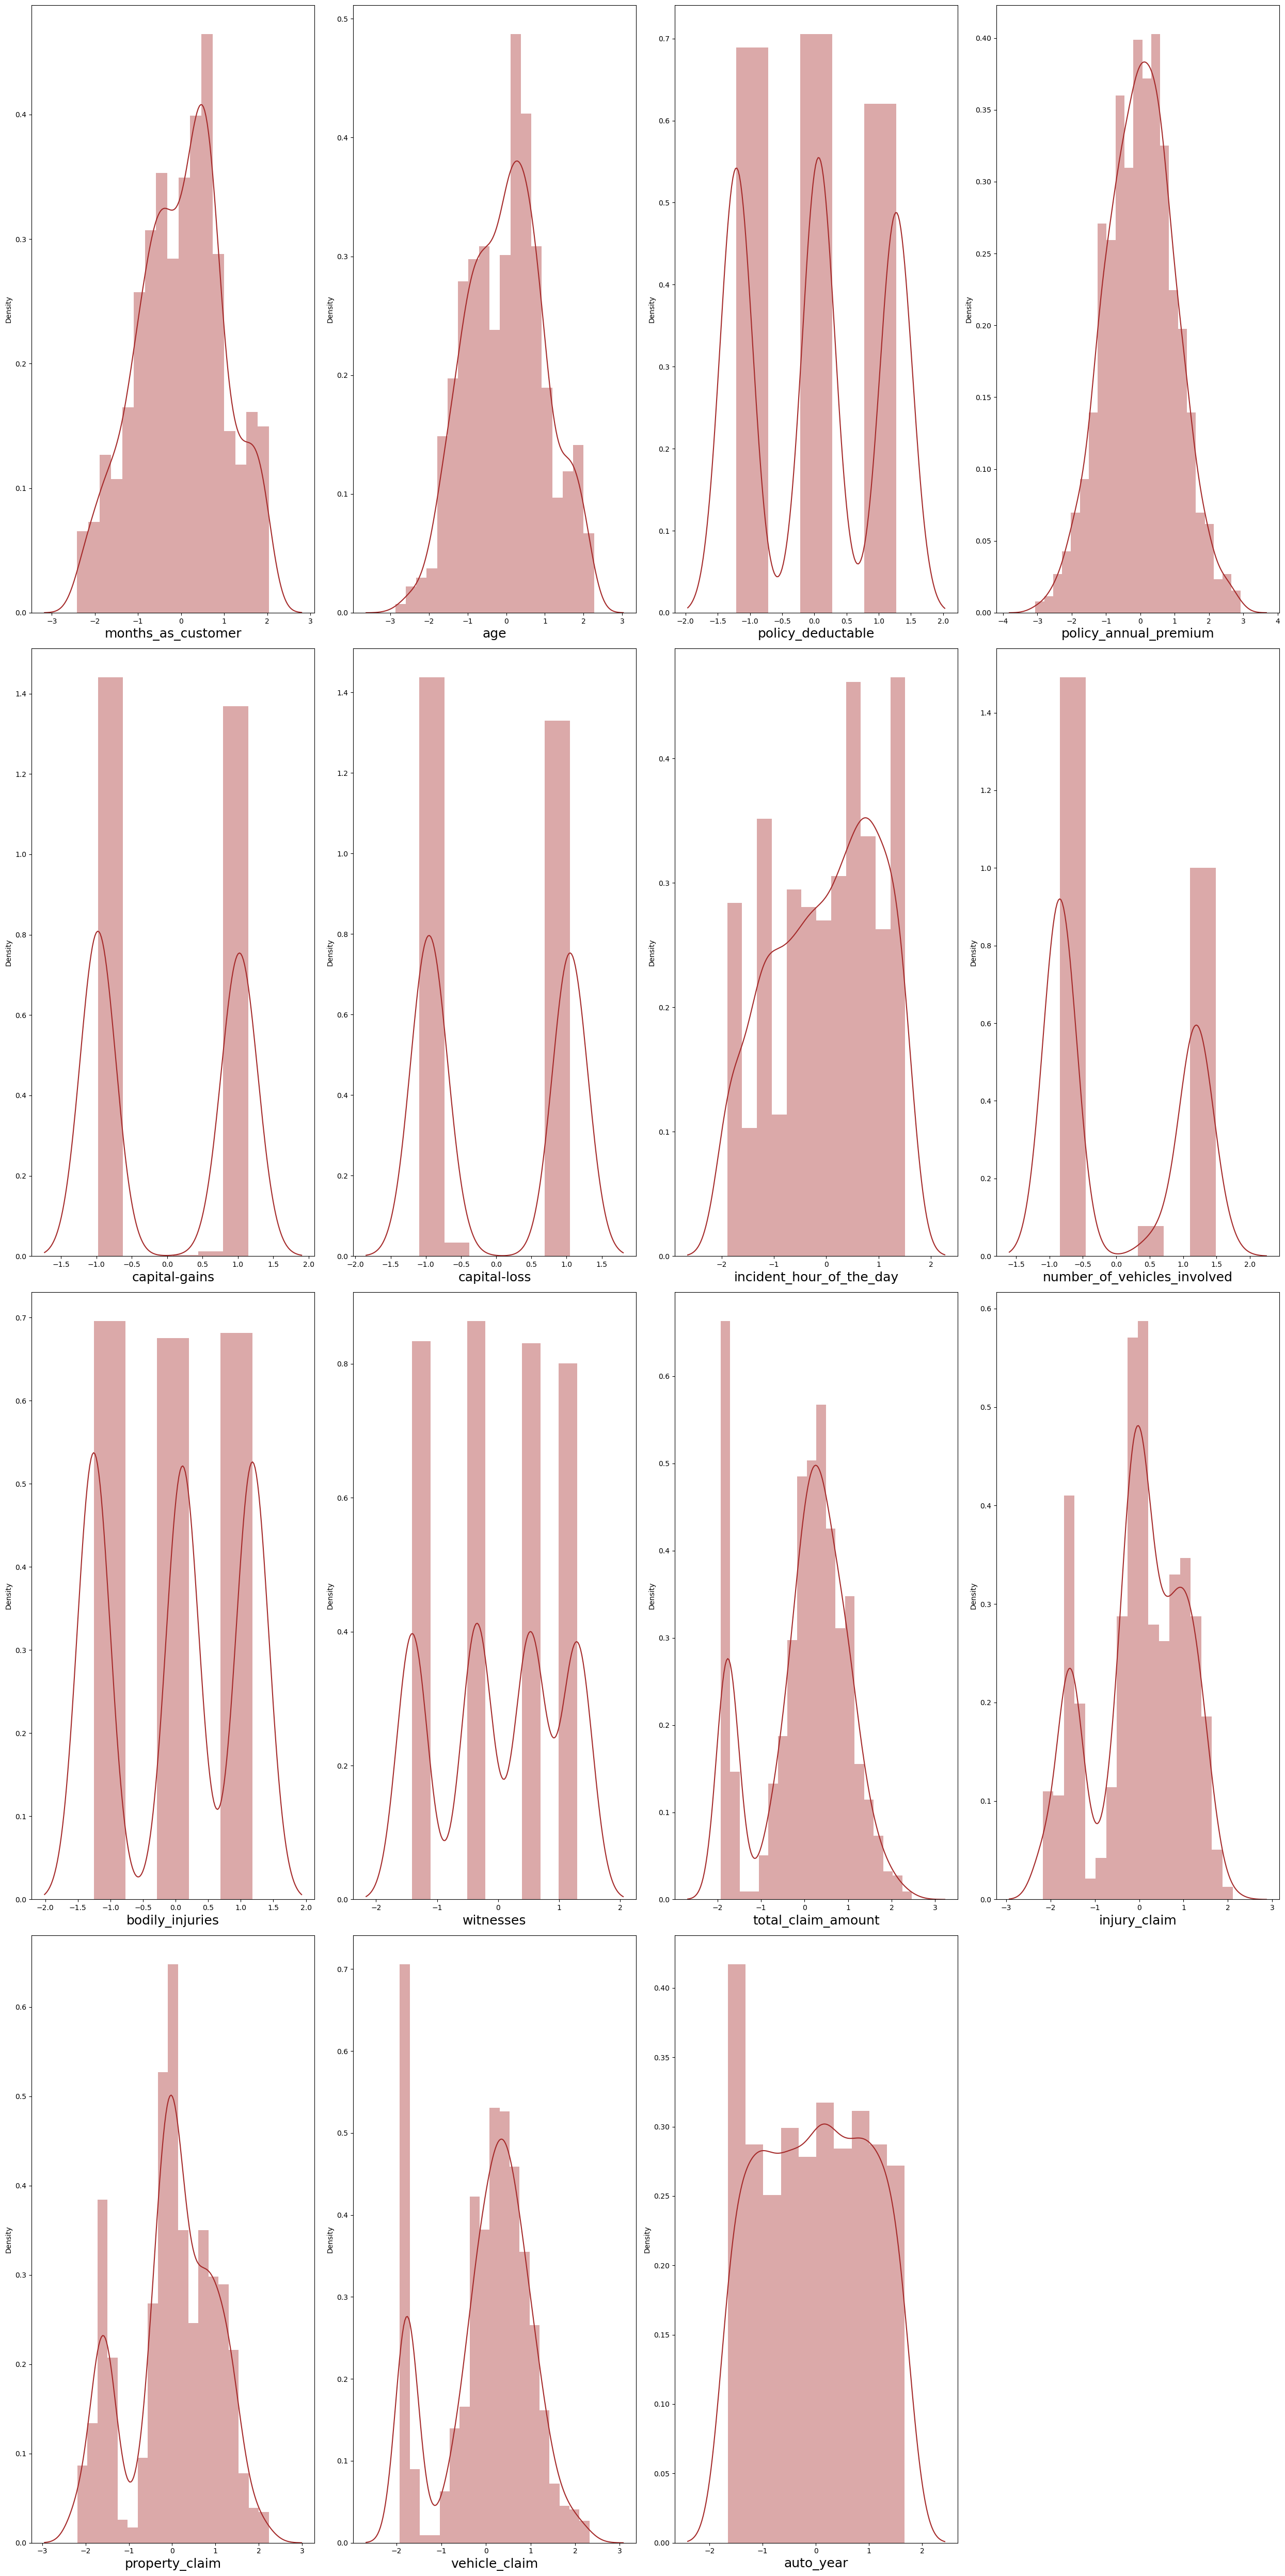

In [523]:
#checking distribution of data after attempting to remove skeweness
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column], color = 'brown')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.tight_layout()

In [ ]:
#Dealing with multicollinearity.It be must removed but before that we need to seperate features and labels

In [524]:
#seperate the target and independent variables into x and y
x=df.drop("fraud_reported",axis=1)
y=df["fraud_reported"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (994, 31)
Label Dimension= (994,)


In [525]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

months_as_customer       age  policy_state  policy_csl  \
0              0.301217  0.428003     -0.016956    0.063724   
1             -0.515793 -1.141637      1.186952   -1.178274   
2              0.520361  0.324394     -1.220865    0.063724   
3              0.301217  0.628588     -1.220865    1.305723   
4              0.520361  0.110017      1.186952    0.063724   
..                  ...       ...           ...         ...   
989           -2.294794 -0.000985      1.186952    1.305723   
990            0.738797  0.324394     -1.220865   -1.178274   
991           -0.554332 -0.473579      1.186952    0.063724   
992            1.911804  2.129864     -1.220865    1.305723   
993            1.899230  1.984636      1.186952    0.063724   

     policy_deductable  policy_annual_premium  insured_sex  \
0             1.270291              -0.243205     1.075259   
1             1.270291               0.651313    -0.930008   
2             1.270291               0.662021    -0.930008   
3             0.066276               1.351637     1.075259   
4             0.066276               0.395389    -0.930008   
..                 ...                    ...          ...   
989           0.066276               0.228686    -0.930008   
990           0.066276               0.748655    -0.930008   
991          -1.211098               0.529107    -0.930008   
992           1.270291               0.419433     1.075259   
993           0.066276              -2.067478    -0.930008   

     insured_education_level  insured_occupation  insured_relationship  ...  \
0                   0.531182           -0.166594             -0.247232  ...   
1                   1.556415            1.078479              0.347801  ...   
2                   1.556415           -1.411668              0.942834  ...   
3                  -1.519283            1.078479              0.942834  ...   
4                   1.556415            1.327494              0.942834  ...   
..                       ...                 ...                   ...  ...   
989                 1.043798           -1.162653              0.942834  ...   
990                 1.556415            0.580450              1.537867  ...   
991                 1.043798           -1.411668             -0.247232  ...   
992                -1.519283           -0.415609              1.537867  ...   
993                -1.519283            1.078479             -1.437298  ...   

     bodily_injuries  witnesses  police_report_available  total_claim_amount  \
0          -1.256685  -1.407548                 0.853637           -1.776409   
1           1.178225   1.295395                -1.171459           -0.713791   
2           0.106082   0.525814                -1.171459            0.394646   
3          -1.256685  -0.346985                -1.171459           -1.729004   
4          -1.256685   0.525814                -1.171459            0.422169   
..               ...        ...                      ...                 ...   
989        -1.256685  -0.346985                 0.853637            1.341302   
990         1.178225   1.295395                 0.853637            2.203743   
991         1.178225   1.295395                 0.853637            0.556152   
992        -1.256685  -0.346985                 0.853637           -0.244229   
993        -1.256685   1.295395                 0.853637           -1.776738   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0       -1.522914       -1.557511      -1.785964   0.360578   -0.661344   
1        0.226273       -0.576090      -0.818179  -0.632260    0.956480   
2       -0.024059       -0.031727       0.679431  -0.880470    1.315996   
3       -1.301397       -1.622221      -1.739146  -1.625098    1.046359   
4       -0.010634       -0.017889       0.710698   0.856997   -1.470255   
..            ...             ...            ...        ...         ...   
989      1.638399        0.407955       1.260054  -0.135841   -1.200

In [526]:
#Checking Variance inflation factor in each scaled column that is x.shape[1](1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values                     Features
0     4.682804           months_as_customer
1     4.699494                          age
2     1.027599                 policy_state
3     1.026268                   policy_csl
4     1.035954            policy_deductable
5     1.028961        policy_annual_premium
6     1.029093                  insured_sex
7     1.040684      insured_education_level
8     1.018658           insured_occupation
9     1.029681         insured_relationship
10    1.028243                capital-gains
11    1.040600                 capital-loss
12    6.290670                incident_type
13    1.093716               collision_type
14    1.210274            incident_severity
15    1.103273        authorities_contacted
16    1.034214               incident_state
17    1.025133                incident_city
18    1.091834     incident_hour_of_the_day
19    6.327648  number_of_vehicles_involved
20    1.023463              property_damage
21    1.021069              bodily_injuries
22    1.038260                    witnesses
23    1.031739      police_report_available
24  238.286349           total_claim_amount
25   10.814049                 injury_claim
26   11.091883               property_claim
27  121.236210                vehicle_claim
28    1.075968                    auto_make
29    1.064693                   auto_model
30    1.037915                    auto_year

In [527]:
#VIF must not be over 10
#Dropping total_claim_amount because it has the highest VIF
x = x.drop(["total_claim_amount"],axis=1)

In [420]:
#Checking Variance inflation factor in each scaled column that is x.shape[1](1/(1-R2)) again
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values                     Features
0     4.681800           months_as_customer
1     4.694142                          age
2     1.027556                 policy_state
3     1.024602                   policy_csl
4     1.035778            policy_deductable
5     1.022853        policy_annual_premium
6     1.027559                  insured_sex
7     1.040683      insured_education_level
8     1.016709           insured_occupation
9     1.029621         insured_relationship
10    1.028232                capital-gains
11    1.040043                 capital-loss
12    6.290580                incident_type
13    1.085760               collision_type
14    1.194099            incident_severity
15    1.084935        authorities_contacted
16    1.031534               incident_state
17    1.022364                incident_city
18    1.088235     incident_hour_of_the_day
19    6.309472  number_of_vehicles_involved
20    1.023002              property_damage
21    1.019428              bodily_injuries
22    1.038253                    witnesses
23    1.031360      police_report_available
24    2.497594                 injury_claim
25    2.706079               property_claim
26    3.652231                vehicle_claim
27    1.071729                    auto_make
28    1.064520                   auto_model
29    1.037731                    auto_year

In [ ]:
Multicollinearity has been eliminated,I can proceed with model building

In [528]:
#checking the target variable
y.value_counts()

fraud_reported
0    749
1    245
Name: count, dtype: int64

In [529]:
#Oversampling the data
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x, y)

Defaulting to user installation because normal site-packages is not writeable


In [530]:
#Modelling

#Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random_state",maxRS)

Best accuracy is  0.8260869565217391 at random_state 189


In [531]:
#defining train and test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [532]:
#Import classification algorithms

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [533]:
#checking accuracy for Random Forest Classifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8193979933110368
[[223  21]
 [ 33  22]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       244
           1       0.51      0.40      0.45        55

    accuracy                           0.82       299
   macro avg       0.69      0.66      0.67       299
weighted avg       0.80      0.82      0.81       299



In [534]:
#checking testing accuracy for KNeighbors
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.7525083612040134
[[216  28]
 [ 46   9]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       244
           1       0.24      0.16      0.20        55

    accuracy                           0.75       299
   macro avg       0.53      0.52      0.52       299
weighted avg       0.72      0.75      0.73       299



In [535]:
#checking accuracy of Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8193979933110368
[[225  19]
 [ 35  20]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       244
           1       0.51      0.36      0.43        55

    accuracy                           0.82       299
   macro avg       0.69      0.64      0.66       299
weighted avg       0.80      0.82      0.81       299



In [536]:
#checking accuracy for Support Vector Machine Classifier
SVC=SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.8127090301003345
[[234  10]
 [ 46   9]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       244
           1       0.47      0.16      0.24        55

    accuracy                           0.81       299
   macro avg       0.65      0.56      0.57       299
weighted avg       0.77      0.81      0.77       299



In [537]:
#checking accuracy for Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8127090301003345
[[218  26]
 [ 30  25]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       244
           1       0.49      0.45      0.47        55

    accuracy                           0.81       299
   macro avg       0.68      0.67      0.68       299
weighted avg       0.81      0.81      0.81       299



In [538]:
#checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8127090301003345
[[216  28]
 [ 28  27]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       244
           1       0.49      0.49      0.49        55

    accuracy                           0.81       299
   macro avg       0.69      0.69      0.69       299
weighted avg       0.81      0.81      0.81       299



In [539]:
#checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8361204013377926
[[227  17]
 [ 32  23]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       244
           1       0.57      0.42      0.48        55

    accuracy                           0.84       299
   macro avg       0.73      0.67      0.69       299
weighted avg       0.82      0.84      0.83       299



In [540]:
#checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8093645484949833
[[229  15]
 [ 42  13]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       244
           1       0.46      0.24      0.31        55

    accuracy                           0.81       299
   macro avg       0.65      0.59      0.60       299
weighted avg       0.77      0.81      0.78       299



In [541]:
#Cross validation Score
from sklearn.model_selection import cross_val_score

In [542]:
#Checking CV score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predRFC)-score.mean())

[0.77386935 0.77386935 0.74874372 0.76884422 0.77777778]
0.7686208821887214
Difference between Accuracy score and cross validation score is - 0.05077711112231542


In [543]:
#Checking CV score for KNeighbours Classifier
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predKNN)-score.mean())

[0.77386935 0.73366834 0.72864322 0.72361809 0.72727273]
0.7374143444495204
Difference between Accuracy score and cross validation score is - 0.015094016754493067


In [544]:
#Checking CV score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predLR)-score.mean())

[0.78894472 0.76884422 0.73869347 0.8040201  0.8030303 ]
0.7807065631186234
Difference between Accuracy score and cross validation score is - 0.03869143019241339


In [545]:
#Checking CV score for Support Vector Machine Classifier
score=cross_val_score(SVC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predSVC)-score.mean())

[0.75879397 0.72361809 0.72864322 0.76884422 0.75252525]
0.7464849500025379
Difference between Accuracy score and cross validation score is - 0.06622408009779657


In [546]:
#Checking CV score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predGB)-score.mean())

[0.77889447 0.73366834 0.72361809 0.76884422 0.81313131]
0.7636312877518908
Difference between Accuracy score and cross validation score is - 0.04907774234844364


In [547]:
#Checking CV score for AdaBoost Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predABC)-score.mean())

[0.79899497 0.73869347 0.75376884 0.79396985 0.80808081]
0.77870158875184
Difference between Accuracy score and cross validation score is - 0.03400744134849443


In [548]:
#Checking CV score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predBC)-score.mean())

[0.81909548 0.75376884 0.73366834 0.77889447 0.81313131]
0.7797116897619409
Difference between Accuracy score and cross validation score is - 0.0564087115758517


In [549]:
#Checking CV score for ExtraTreesClassifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predET)-score.mean())

[0.75879397 0.75376884 0.75879397 0.77889447 0.79292929]
0.7686361098421399
Difference between Accuracy score and cross validation score is - 0.04072843865284337


In [ ]:
I selected LogisticRegression as the best model because it has a low difference between Accuracy and 
cross validation score and a good accuracy score

In [563]:
#Hyper parameter tuning

from sklearn.model_selection import GridSearchCV
parameters={'penalty' : ['l1', 'l2', 'elasticnet', None], 
              'dual' : [True,False],
              'C' : [0.1, 0.2, 0.3, 0.5, 1.0], 
              'fit_intercept': [True,False],
              'random_state':[10,12,14,20, None]}

GVC=GridSearchCV(LogisticRegression(),parameters,cv=5)
GVC.fit(x_train,y_train)

GVC.best_params_
{'penalty':'l2','dual':False,'C':1.0,'fit_intercept':True,'random_state':None}

Final_model=LogisticRegression(penalty='l2',dual=False,C=1.0,fit_intercept=True,random_state=None)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

81.93979933110369


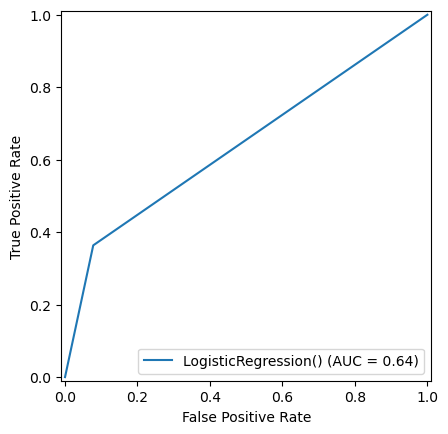

In [564]:
#Plotting ROC and compare AUC for  the model used
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

In [ ]:
The model has an AUC = 64% and 81.9% accuracy

In [565]:
#Saving the model
import joblib
joblib.dump(Final_model,"Insurance_Claim_Fraud_Detection.pkl")

['Insurance_Claim_Fraud_Detection.pkl']

In [566]:
#Loading the saved model to get predictions
model=joblib.load("Insurance_Claim_Fraud_Detection.pkl")

In [567]:
#Prediction
prediction=model.predict(x_test)
prediction

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

In [568]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df
#the predictions for Income

Predicted  Original
0            1         0
1            1         0
2            0         0
3            0         0
4            0         0
..         ...       ...
294          0         0
295          0         0
296          0         0
297          0         0
298          0         0

[299 rows x 2 columns]